# **Trabalho \#2**:  Aprendizado de Máquina e Reconhecimento de Padrões MC886/MO444
Instituto de Computação (IC/UNICAMP), 2ᵒ Semestre, 2024

Profa. Sandra Avila, 2024s2

Trabalho proposto por Caio Petrucci Rosa (PAD), Cesar Guedes Carneiro (PED) e Sandra Avila.



In [ ]:
# TODO: RA & Nome
print('236087: ' + 'Decio_Miranda_Filho')
print('066505: ' + 'Rafael Simionato')
ra = 236066 # Para a seed

236087: Decio_Miranda_Filho
066505: Rafael Simionato


## Objetivo

Explore os modelos de **regressão linear** e **regressão logística** e apresente o melhor modelo que você encontrar para o problema, evitando o *overfitting*. Em particular, realize predições acerca do salário dos profissionais da área de dados no Brasil, com base nos dados da pesquisa State of Data Brazil 2023, levando em consideração variáveis como perfil demográfico, formação, experiência e atuação no setor.


---

## Base de Dados

A base de dados deste trabalho foi criado a partir de dados disponibilizados em [State of Data Brazil 2023](https://www.kaggle.com/datasets/datahackers/state-of-data-brazil-2023). Os dados refletem a pesquisa realizada com profissionais da área de Ciência de Dados no Brasil. As respostas foram coletadas em 2023 e a base de dados contém uma ampla variedade de perguntas sobre o perfil demográfico, situação profissional e conhecimentos técnicos dessas pessoas.

**Dicionário de dados:**

* **id**: Identificador único da pessoa participante;

* **idade**: Idade da pessoa participante;

* **genero**: Gênero da pessoa participante;

* **cor_raca**: Cor/raça/etnia da pessoa participante;

* **pcd**: Se a pessoa participante possui alguma deficiência (PCD);

* **estado_residencia**: Estado onde a pessoa participante mora;

* **mudou_estado**: Se a pessoa participante mudou de estado recentemente;

* **regiao_origem**: Região de origem da pessoa participante;

* **nivel_ensino**: Nível de ensino da pessoa participante;

* **area_formacao**: Área de formação acadêmica;

* **situacao_trabalho**: Situação atual de trabalho;

* **setor**: Setor em que a pessoa participante trabalha;

* **numero_funcionarios**: Número de funcionários na empresa onde a pessoa participante trabalha;

* **gestor**: Se a pessoa participante é gestor na empresa;

* **cargo**: Cargo da pessoa participante;

* **nivel_profissional**: Nível profissional da pessoa participante;

* **tempo_exp_dados**: Tempo de experiência na área de dados;

* **tempo_exp_ti**: Tempo de experiência prévia na área de TI ou Engenharia de Software antes de atuar com dados;

* **satisfacao_empresa**: Nível de satisfação da pessoa participante com sua empresa atual;

* **forma_trabalho_atual**: Forma de trabalho atual (presencial, remoto, híbrido);

* **atuacao_dia_a_dia**: Reflexão da atuação da pessoa participante no dia a dia em relação ao cargo formal;

* **fontes_dados_analise**: Fontes de dados já analisadas ou processadas pela pessoa participante no trabalho;

* **fontes_dados_uso**: Fontes de dados mais utilizadas pela pessoa participante no trabalho;

* **linguagens_trabalho**: Linguagens de programação utilizadas no trabalho;

* **linguagem_mais_usada**: Linguagem de programação mais utilizada no trabalho;

* **linguagem_preferida**: Linguagem de programação preferida da pessoa participante;

* **bancos_dados_trabalho**: Bancos de dados utilizados no trabalho;

* **cloud_preferida**: Cloud preferida da pessoa participante;

* **cloud_usada**: Cloud usada no trabalho;

* **ferramenta_bi_dia_a_dia**: Ferramenta de BI utilizada no dia a dia;

* **ferramenta_bi_preferida**: Ferramenta de BI preferida;

* **tipo_uso_ai**: Tipo de uso de AI Generativa e LLMs na empresa;

* **uso_chatgpt**: Se a pessoa participante utiliza ChatGPT ou LLMs no trabalho;

* **faixa_salarial**: Faixa salarial da pessoa participante;

* **salario**: Valor do salário da pessoa participante.


Você deve **respeitar a seguinte divisão de treino/teste**:

    train_data.csv
    test_data.csv

Lembre-se de criar **seu próprio conjunto de validação**, a partir um subconjunto do conjunto de treinamento, e utilize o conjunto de teste (a ser disponibilizado) apenas para inferência e relato do resultado final.

### Atividades

1. (0,4 pontos) Realize a limpeza e preparação dos dados de treinamento.

  > **Considere os seguintes fatores:**
  > - Existem outliers nos dados? Se sim, como você pretende tratá-los (removê-los, ajustá-los, ou usar uma abordagem alternativa)?
  > - Há valores ausentes? Se sim, como irá lidar com eles? (Ex.: exclusão de linhas, preenchimento por média/mediana/moda, ou outros métodos).
  > - Como você planeja tratar variáveis categóricas? (Ex.: one-hot encoding, label encoding, ou outra estratégia).

In [ ]:
import os
import random
import pandas as pd
pd.set_option('display.max_columns', 50)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/MO444/') # Dec`s path

In [ ]:
# TODO: Carregue e pré-processe (limpeza e preparação) os dados

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv("train_data.csv")

O primeiro tratamento a ser feito é conferrir se há alguma variável com uma proporçã muito grande de missings. Para isso, vamos detectar quais das variáveis possuem mais de 30% de missings.

In [ ]:
df.isnull().sum()/len(df)

,0
id,0.000000
idade,0.000000
genero,0.000000
cor_raca,0.000000
pcd,0.000000
estado_residencia,0.021831
mudou_estado,0.021831
regiao_origem,0.798790
nivel_ensino,0.000000
area_formacao,0.021042


In [ ]:
df.situacao_trabalho.value_counts()

,count
situacao_trabalho,
Empregado (CLT),2870
Empreendedor ou Empregado (CNPJ),455
Estagiário,169
Servidor Público,113
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil,94
Vivo fora do Brasil e trabalho para empresa de fora do Brasil,52
Freelancer,42
Prefiro não informar,7


In [ ]:
X_train_for_regression_logistic.mudou_estado

,mudou_estado
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
2969,0.0
2970,1.0
2971,1.0
2972,0.0


Com isso, note que as variáveis com essa quantidade grande serão exlcuídas, porque imputar dados a uma quantidade tão grande poderia introduzir um ruído desnecessário.

In [ ]:
df = df.drop(df.columns[df.isnull().sum()/len(df) > 0.2],axis=1)

Analisando a alta quantidade de remancescente de dados decidiu-se plotar a matriz de correlação a priori para facilitar o tratamento posterior e retirar features problemáticas

In [ ]:
## Apenas para checar a correlação aplicamos Label Encoder - Posteriormente utilizaremos outra forma de codificação para as variáveis categóricas.
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
df_correl = df.copy()
for row in df_correl.loc[:,df_correl.dtypes == 'object'].columns:
    df_correl[row] = label_enc.fit_transform(df[row])


corr = df_correl.corr()

corr.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,id,idade,genero,cor_raca,pcd,estado_residencia,mudou_estado,nivel_ensino,area_formacao,situacao_trabalho,setor,numero_funcionarios,gestor,nivel_profissional,tempo_exp_dados,tempo_exp_ti,satisfacao_empresa,forma_trabalho_atual,cargo,faixa_salarial,salario
id,1.00,0.01,0.01,-0.01,0.01,-0.01,0.02,-0.01,-0.00,0.01,0.02,0.00,-0.01,-0.01,0.01,-0.02,-0.01,-0.01,-0.01,0.00,-0.00
idade,0.01,1.00,0.02,-0.03,0.02,0.02,-0.08,0.26,-0.09,0.05,0.04,-0.03,0.28,0.40,-0.17,-0.06,0.03,-0.05,0.25,-0.06,0.30
genero,0.01,0.02,1.00,0.01,-0.01,-0.01,0.02,-0.03,-0.01,0.01,0.01,0.04,0.06,0.08,0.04,0.04,0.02,-0.02,0.07,-0.01,0.09
cor_raca,-0.01,-0.03,0.01,1.00,0.02,-0.17,-0.02,-0.02,-0.07,-0.01,0.02,-0.01,-0.04,-0.08,-0.02,0.03,-0.03,-0.05,-0.02,0.03,-0.07
pcd,0.01,0.02,-0.01,0.02,1.00,-0.02,-0.03,-0.01,0.01,0.03,-0.04,-0.02,-0.02,-0.02,-0.03,-0.01,0.00,-0.00,-0.02,-0.01,-0.00
estado_residencia,-0.01,0.02,-0.01,-0.17,-0.02,1.00,0.03,0.03,0.01,0.01,-0.02,-0.07,0.04,0.08,0.03,-0.01,0.00,0.20,0.00,-0.03,0.12
mudou_estado,0.02,-0.08,0.02,-0.02,-0.03,0.03,1.00,0.00,-0.05,-0.02,0.01,-0.01,-0.05,-0.06,-0.01,-0.02,0.01,0.00,-0.05,0.02,-0.05
nivel_ensino,-0.01,0.26,-0.03,-0.02,-0.01,0.03,0.00,1.00,-0.05,0.00,0.01,-0.07,0.15,0.25,0.04,0.02,0.01,0.03,0.08,0.08,0.12
area_formacao,-0.00,-0.09,-0.01,-0.07,0.01,0.01,-0.05,-0.05,1.00,-0.02,-0.04,0.02,-0.02,-0.03,0.06,-0.09,-0.03,0.05,-0.05,0.03,-0.02
situacao_trabalho,0.01,0.05,0.01,-0.01,0.03,0.01,-0.02,0.00,-0.02,1.00,0.00,-0.02,-0.05,-0.02,0.00,0.02,-0.01,-0.08,0.04,-0.13,0.23


Após um rigoros entendimento das variáveis preferiu-se optar pela exclusão das features abaixo, com suas devidas justificativas

In [ ]:
new_df = df.drop([
    'genero',              # Baixa correlação com salário - variávle sensível e baixa correlação
    'cor_raca',            # Baixa correlação com salário - variávle sensível e baixa correlação
    'pcd',                 # Baixa correlação com salário - variávle sensível e baixa correlação
    'estado_residencia',   # Baixa correlação com salário - variávle sensível e baixa correlação
    'id',  # Não agrega informação
    'gestor',  #Alta correlação e multicolinearidade
],axis=1)

# new_df.style.background_gradient(cmap='coolwarm').format("{:.2f}")
new_df = new_df.dropna(subset=['mudou_estado'])

In [ ]:
new_df.faixa_salarial.isnull().sum()

0

Com isso, restaram as feature acima, as quais serão utilizadas para o treinamento, mas antes um tratamento será feito. Das variáveis restantes sobraram

Com as variáveis que restam far-se-á o tratamento de missings e a codificaçào apropriada das features categóricas

Aqui será feita a codificação das categóricas que possuírem uma relação ordinal, estabelecendo corretamente a ordem de forma manual

In [ ]:
# Aqui foi encontrado um erro numa coluna com valore fora de ordem, por se tratar de somente uma amostra, foi descartada

# new_df.loc[new_df['numero_funcionarios'] == 'de 501 a 100']
new_df = new_df.drop(new_df.loc[new_df['numero_funcionarios'] == 'de 501 a 100'].index)

In [ ]:
new_df.nivel_ensino.value_counts()

,count
nivel_ensino,
Pós-graduação,1359
Graduação/Bacharelado,1265
Mestrado,457
Estudante de Graduação,415
Doutorado ou Phd,147
Não tenho graduação formal,71
Prefiro não informar,4


In [ ]:
nivel_ensino_order = [
    "Não tenho graduação formal", "Prefiro não informar", "Estudante de Graduação",
    "Graduação/Bacharelado", "Pós-graduação", "Mestrado", "Doutorado ou Phd"]
tempo_exp_dados_order = [
    "Não tenho experiência na área de dados", "Menos de 1 ano", "de 1 a 2 anos", "de 3 a 4 anos",
    "de 4 a 6 anos", "de 5 a 6 anos", "de 7 a 10 anos", "Mais de 10 anos"]
tempo_exp_ti_order = [
    "Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados",
    "Menos de 1 ano", "de 1 a 2 anos", "de 3 a 4 anos", "de 5 a 6 anos", "de 7 a 10 anos", "Mais de 10 anos"]


lista_numero_funcionarios = [
'de 1 a 5','de 6 a 10','de 11 a 50','de 51 a 100','de 101 a 500','de 501 a 1.000','de 1.001 a 3.000','Acima de 3.000']


def apply_custom_label_encoding(df, column, order):
    label_mapping = {label: idx for idx, label in enumerate(order)}
    df[column] = df[column].map(label_mapping)
    return df


new_df = apply_custom_label_encoding(new_df, 'nivel_ensino', nivel_ensino_order)
new_df = apply_custom_label_encoding(new_df, 'tempo_exp_dados', tempo_exp_dados_order)
new_df = apply_custom_label_encoding(new_df, 'tempo_exp_ti', tempo_exp_ti_order)
new_df = apply_custom_label_encoding(new_df, 'numero_funcionarios', lista_numero_funcionarios)


In [ ]:
new_df.nivel_ensino.isnull().sum()

0

In [ ]:
faixa_salarial_order = [
    "Menos de R$ 1.000/mês",
    "de R$ 0/mês a R$ 1.000/mês",
    "de R$ 1.001/mês a R$ 2.000/mês",
    "de R$ 2.001/mês a R$ 3.000/mês",
    "de R$ 3.001/mês a R$ 4.000/mês",
    "de R$ 4.001/mês a R$ 6.000/mês",
    "de R$ 6.001/mês a R$ 8.000/mês",
    "de R$ 8.001/mês a R$ 12.000/mês",
    "de R$ 12.001/mês a R$ 16.000/mês",
    "de R$ 16.001/mês a R$ 20.000/mês",
    "de R$ 20.001/mês a R$ 25.000/mês",
    "de R$ 25.001/mês a R$ 30.000/mês",
    "de R$ 30.001/mês a R$ 40.000/mês",
    "Acima de R$ 40.001/mês"
]


new_df = apply_custom_label_encoding(new_df, 'faixa_salarial', faixa_salarial_order)

Para o Target considerando a classificacão ( Para a regressão Logística)

In [ ]:
# Codificando a variável nivel_profissional a qual será tratada diferente ( mais detalhes adiante)
nivel_prof_ordem = ['Júnio','Pleno',"Sênior"]
new_df = apply_custom_label_encoding(new_df, 'nivel_profissional', nivel_prof_ordem)

In [ ]:
for col in ['area_formacao','situacao_trabalho','setor','forma_trabalho_atual','cargo']:
  print(new_df[col].value_counts())

area_formacao
Computação / Engenharia de Software / Sistemas de Informação/ TI          1529
Outras Engenharias                                                         772
Economia/ Administração / Contabilidade / Finanças/ Negócios               576
Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais     260
Outra opção                                                                189
Marketing / Publicidade / Comunicação / Jornalismo                          99
Química / Física                                                            91
Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde                      72
Ciências Sociais                                                            55
Name: count, dtype: int64
situacao_trabalho
Empregado (CLT)                                                    2859
Empreendedor ou Empregado (CNPJ)                                    445
Estagiário                                                          166
Servidor Públic

In [ ]:
# Codificação para features não ordinais com OneHotEncoder e as categóricas restantes
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# ordinal_cate_features = ['tempo_exp_ti','nivel_profissional']
non_ordinal_cate_features = ['area_formacao','situacao_trabalho','setor','forma_trabalho_atual','cargo']

df_codificado = new_df.copy()

# Codificação para features ordinais
# label_encoders = {}
# for feature in ordinal_cate_features:
#     le = LabelEncoder()
#     df_codificado[feature] = le.fit_transform(df_codificado[feature])
#     label_encoders[feature] = le

df_codificado = pd.get_dummies(df_codificado, columns=non_ordinal_cate_features)

Percebemos que a variável nivel_profissional ainda possui múltiplos valores faltantes, mas ao mesmo tempo parece ter um importância significativa para a variável preditora. Por conta disso, far-se-á uma imputação por KNN em vez de simplesmente imputar uma estatística sumária, que decerto introduziria um viés.


Em contrapartida,para não misturar os dados e evitar criação de vieses, a divisão em treino e validação será feita e a imputação será ralizada sobre cada conjunto individualmente

In [ ]:
from sklearn.model_selection import train_test_split
train,val = train_test_split(df_codificado, test_size=0.2, random_state=ra)

Resolveu-se realizar a normalização das duas variáveis puramente numéricas que restaram

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[['salario','idade']] = scaler.fit_transform(train[['salario','idade']])
val[['salario','idade']] = scaler.fit_transform(val[['salario','idade']])

In [ ]:
from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=3)
# df_imputed = imputer.fit_transform(df_codificado)


knn_missing_imputing = KNNImputer(n_neighbors=3)

# Realizar a imputação de todos os valores missing
df_imputed_train = pd.DataFrame(knn_missing_imputing.fit_transform(train), columns=train.columns)

df_imputed_val = pd.DataFrame(knn_missing_imputing.fit_transform(val), columns=val.columns)

2. (0,5 pontos) Faça uma análise exploratória de dados.

  > Procure entender como os dados se comportam e as relações entre diferentes *features*.
  >
  > **Alguns fatores a serem considerados:** Quais as distribuição dos valores de cada atributos? Como é a correlação entre os diferentes atributos? Existe multicolinearidade entre algumas *features*?

In [ ]:
# TODO: Análise exploratória dos dados
df_imputed_train.describe()

,idade,mudou_estado,nivel_ensino,numero_funcionarios,nivel_profissional,tempo_exp_dados,tempo_exp_ti,satisfacao_empresa,faixa_salarial,salario,area_formacao_Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde,area_formacao_Ciências Sociais,area_formacao_Computação / Engenharia de Software / Sistemas de Informação/ TI,area_formacao_Economia/ Administração / Contabilidade / Finanças/ Negócios,area_formacao_Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais,area_formacao_Marketing / Publicidade / Comunicação / Jornalismo,area_formacao_Outra opção,area_formacao_Outras Engenharias,area_formacao_Química / Física,situacao_trabalho_Empreendedor ou Empregado (CNPJ),situacao_trabalho_Empregado (CLT),situacao_trabalho_Estagiário,situacao_trabalho_Freelancer,situacao_trabalho_Prefiro não informar,situacao_trabalho_Servidor Público,...,forma_trabalho_atual_Modelo 100% remoto,forma_trabalho_atual_Modelo híbrido com dias fixos de trabalho presencial,forma_trabalho_atual_Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente),cargo_Analista de BI/BI Analyst,cargo_Analista de Dados/Data Analyst,cargo_Analista de Inteligência de Mercado/Market Intelligence,cargo_Analista de Negócios/Business Analyst,cargo_Analista de Suporte/Analista Técnico,cargo_Analytics Engineer,cargo_Cientista de Dados/Data Scientist,cargo_DBA/Administrador de Banco de Dados,cargo_Data Product Manager/ Product Manager (PM/APM/DPM/GPM/PO),cargo_Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas,cargo_Diretor/VP,cargo_Economista,cargo_Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect,cargo_Engenheiro de Machine Learning/ML Engineer/AI Engineer,cargo_Estatístico,cargo_Gerente/Head,cargo_Outra Opção,cargo_Outras Engenharias (não inclui dev),cargo_Professor/Pesquisador,cargo_Supervisor/Coordenador,"cargo_Sócio ou C-level (CEO, CDO, CIO, CTO etc)",cargo_Team Leader/Tech Leader
count,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,...,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000
mean,0.271589,0.792872,3.541358,5.249832,1.457521,3.404169,1.563887,0.719906,6.432078,0.108209,0.020175,0.014795,0.408541,0.150303,0.070276,0.029254,0.050773,0.210155,0.024546,0.119368,0.768998,0.043040,0.008406,0.002354,0.031271,...,0.462004,0.171822,0.196032,0.107263,0.190989,0.008406,0.041358,0.014459,0.033289,0.143241,0.003362,0.017485,0.020175,0.008070,0.001345,0.143578,0.014122,0.003699,0.066577,0.057162,0.005380,0.005716,0.071621,0.017485,0.025219
std,0.143915,0.405317,1.088795,1.949529,0.475635,1.958894,1.914710,0.449121,2.364653,0.100659,0.140622,0.120751,0.491647,0.357428,0.255654,0.168545,0.219572,0.407487,0.154763,0.324275,0.421545,0.202981,0.091314,0.048466,0.174079,...,0.498638,0.377290,0.397060,0.309499,0.393146,0.091314,0.199151,0.119392,0.179419,0.350378,0.057899,0.131091,0.140622,0.089485,0.036656,0.350720,0.118015,0.060715,0.249330,0.232191,0.073163,0.075402,0.257902,0.131091,0.156815
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.176471,1.000000,3.000000,4.000000,1.000000,2.00

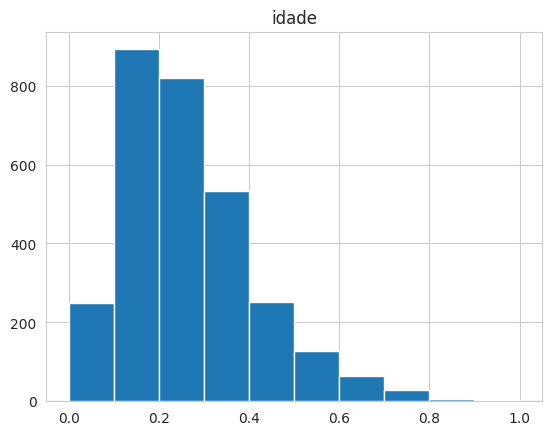

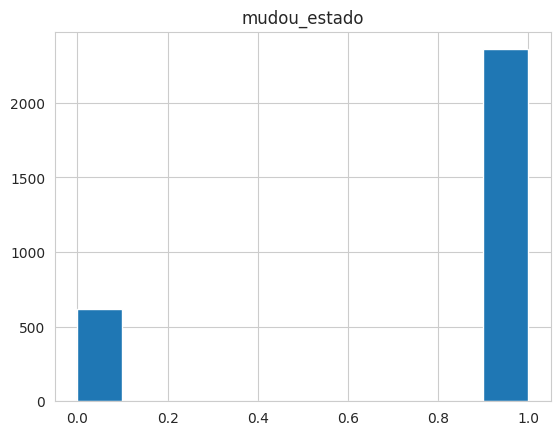

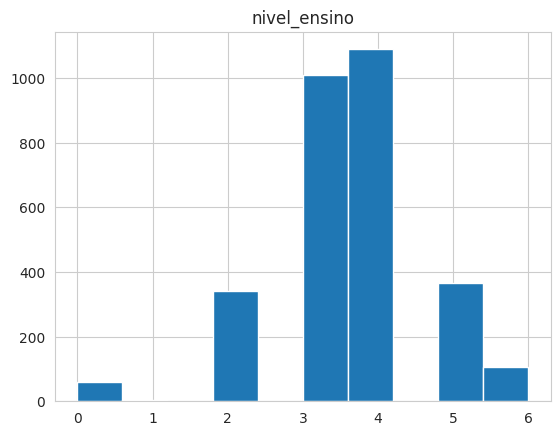

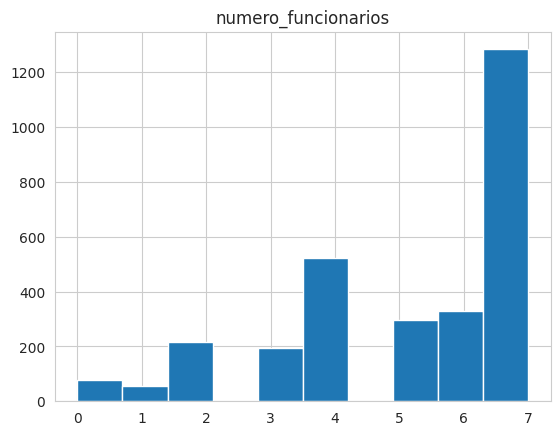

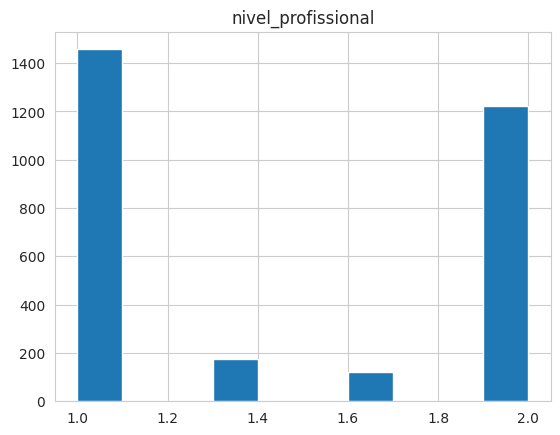

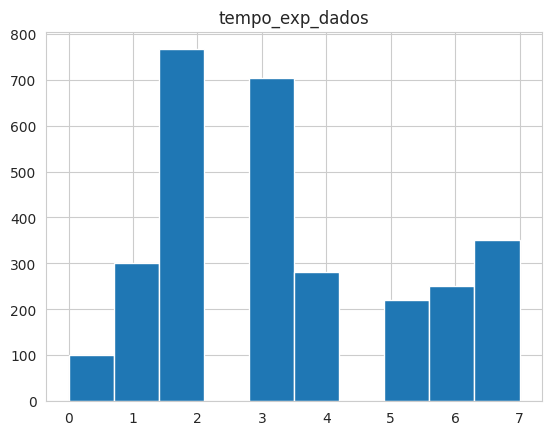

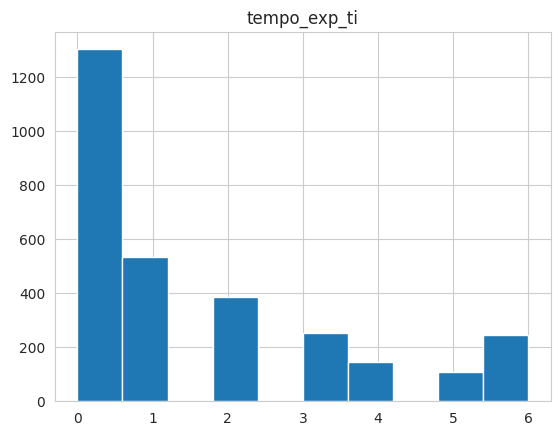

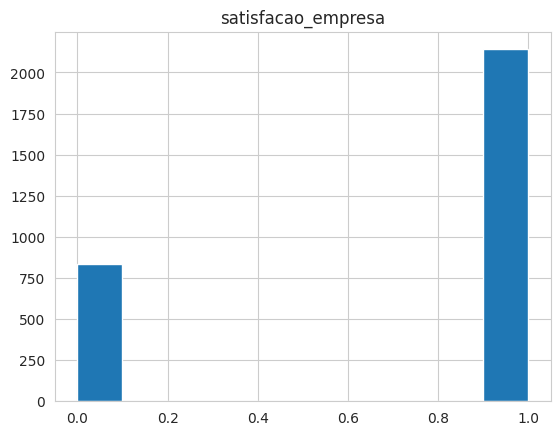

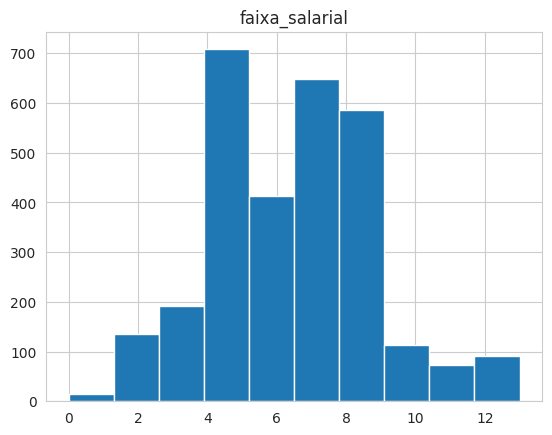

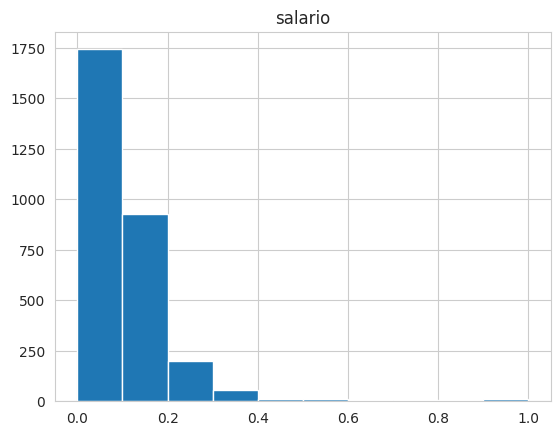

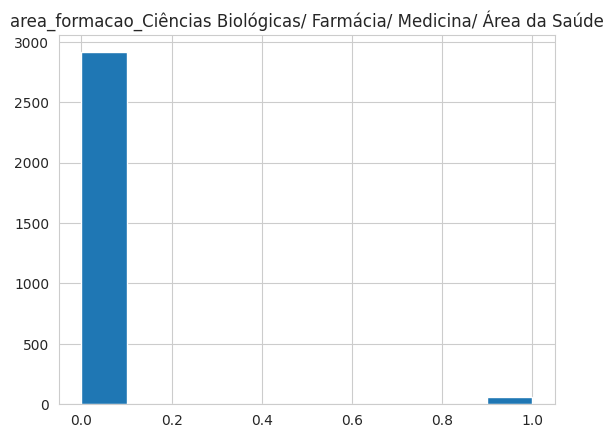

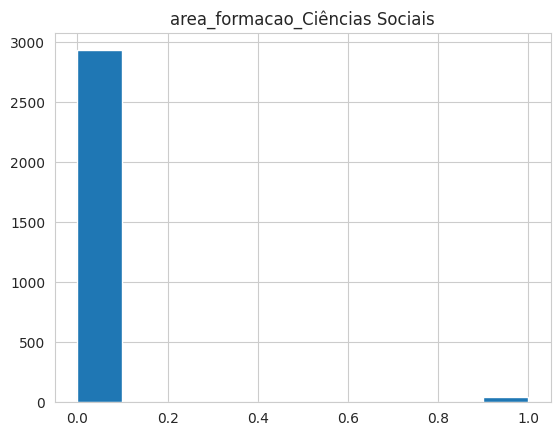

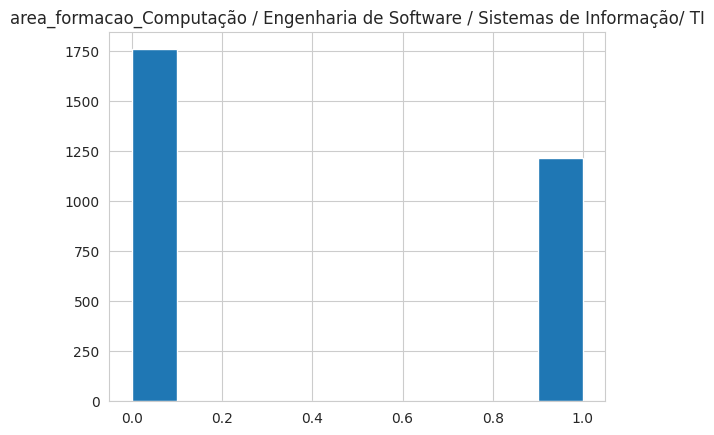

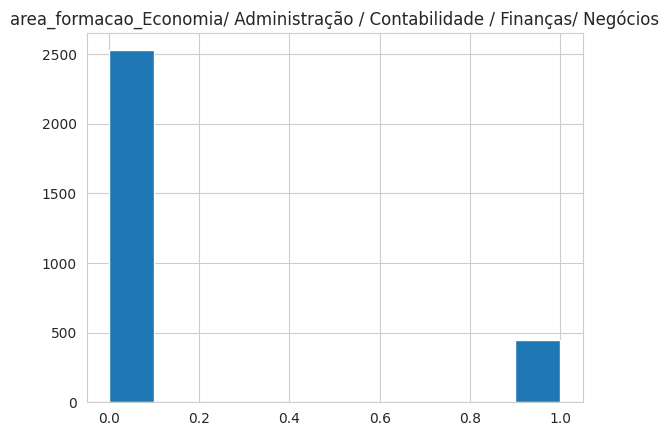

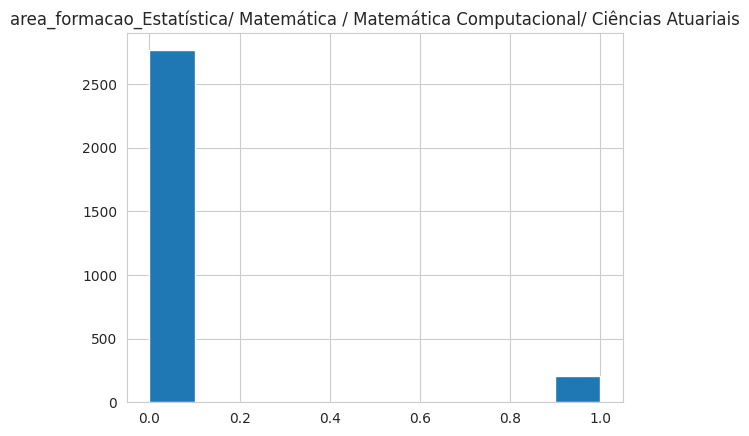

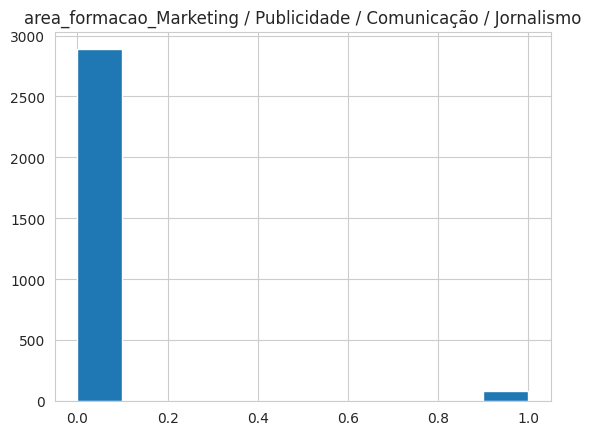

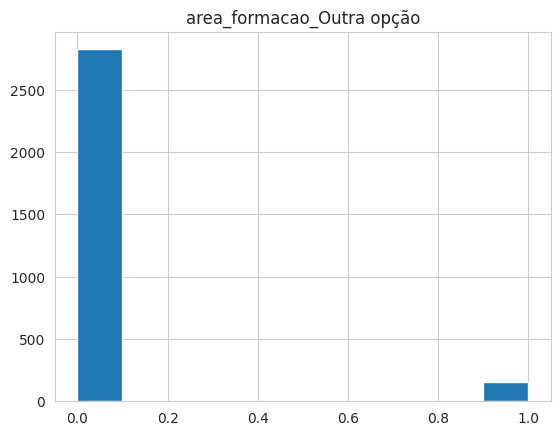

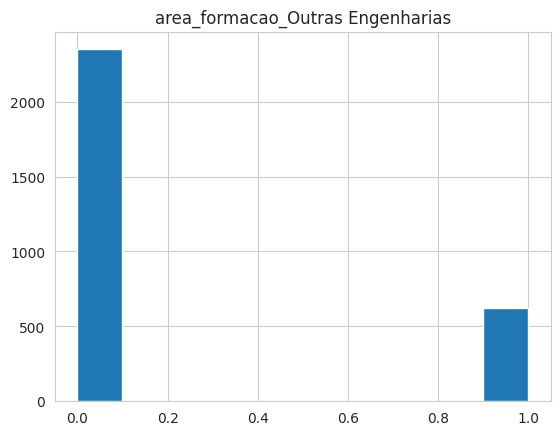

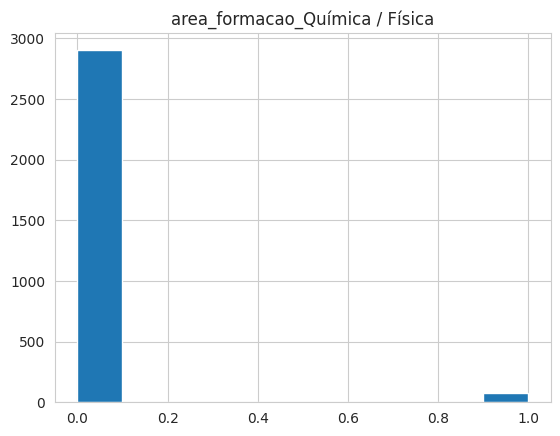

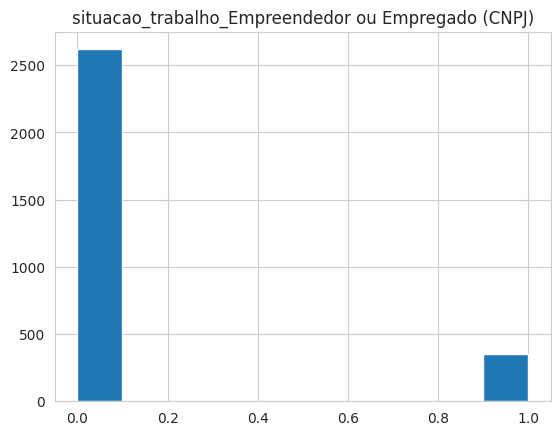

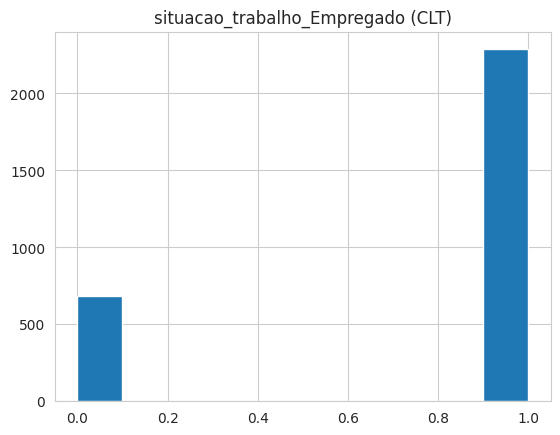

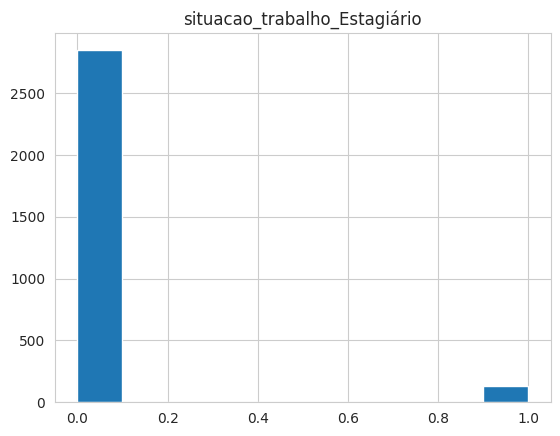

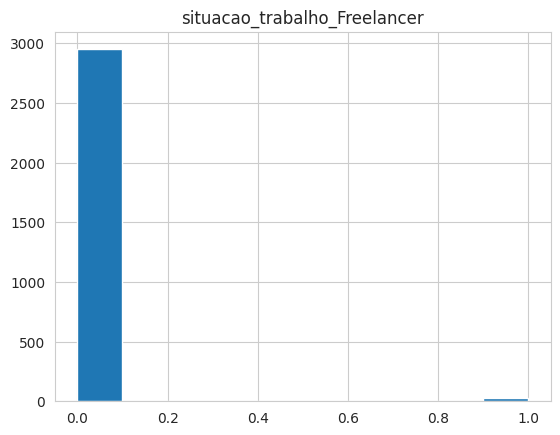

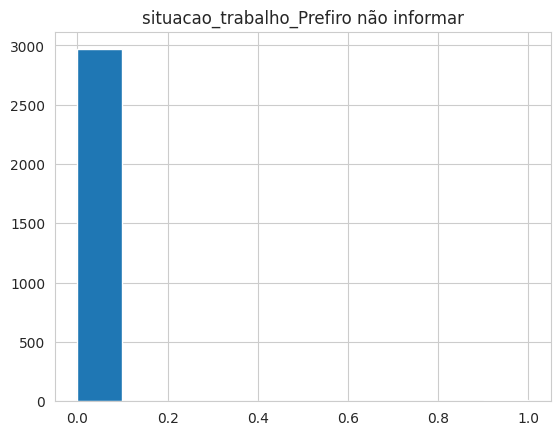

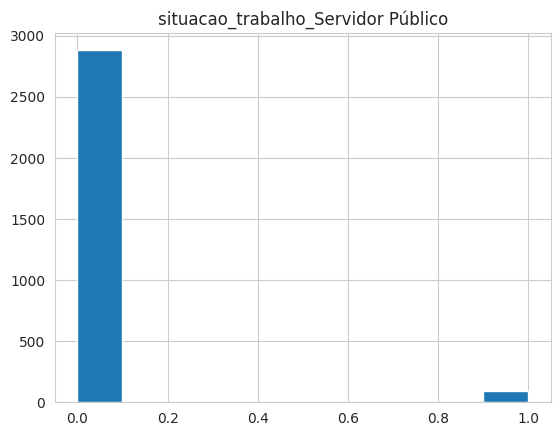

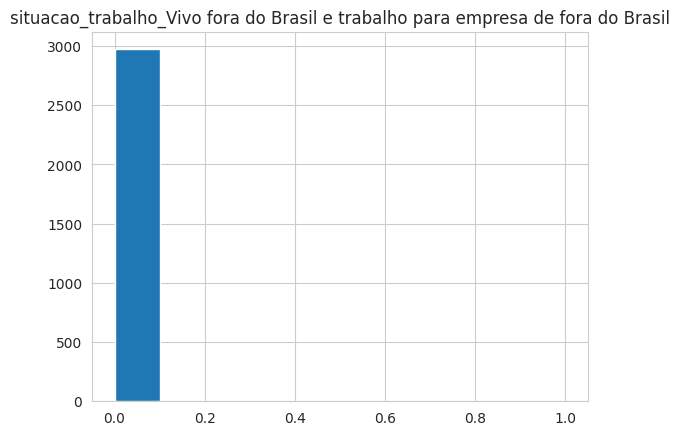

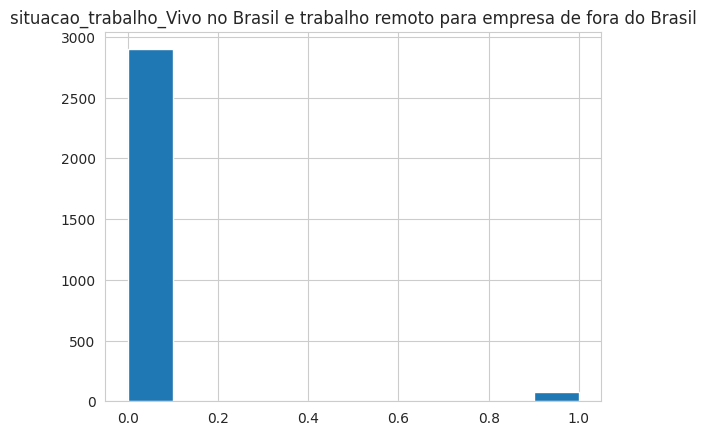

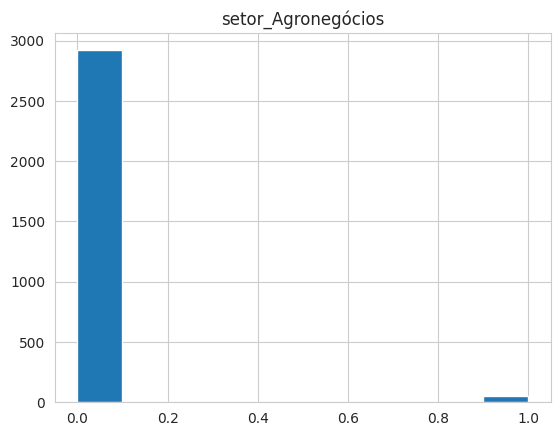

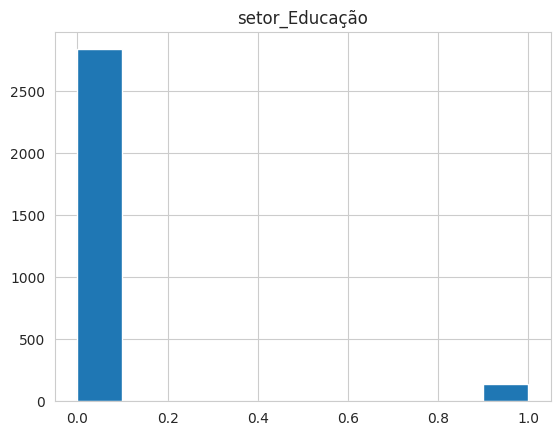

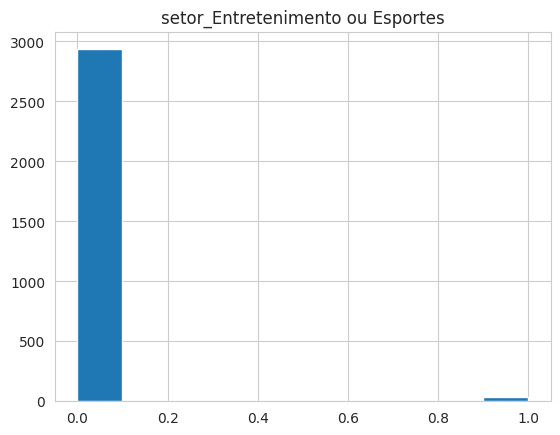

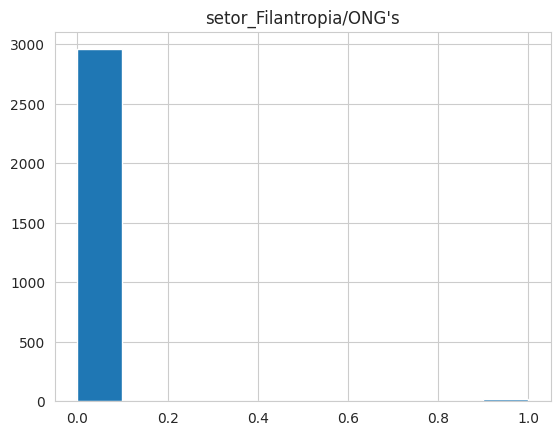

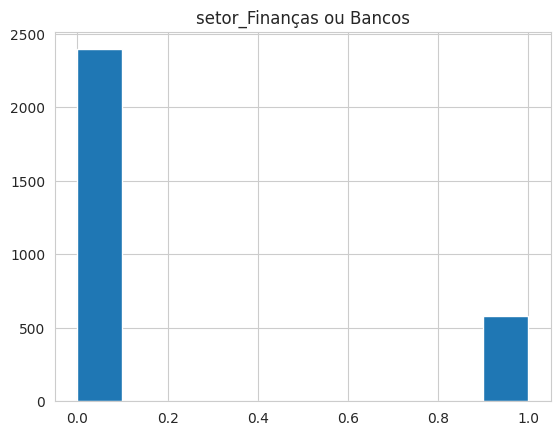

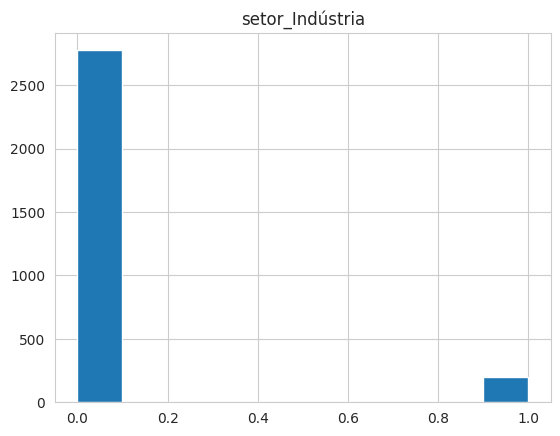

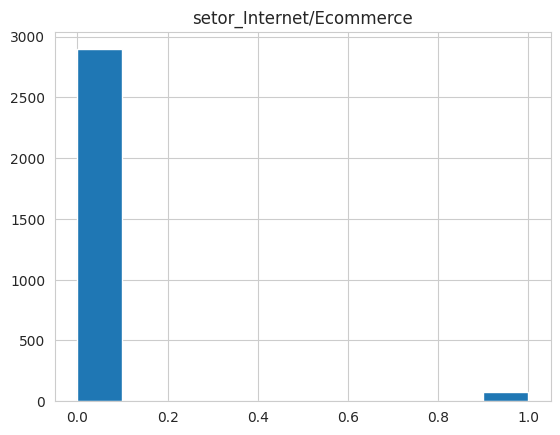

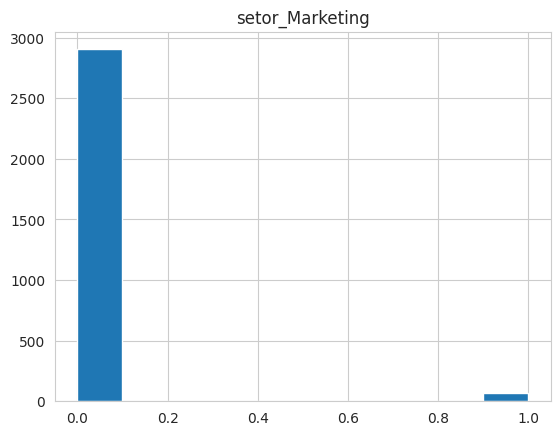

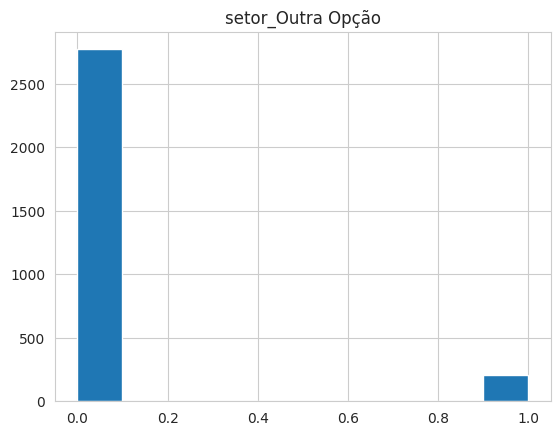

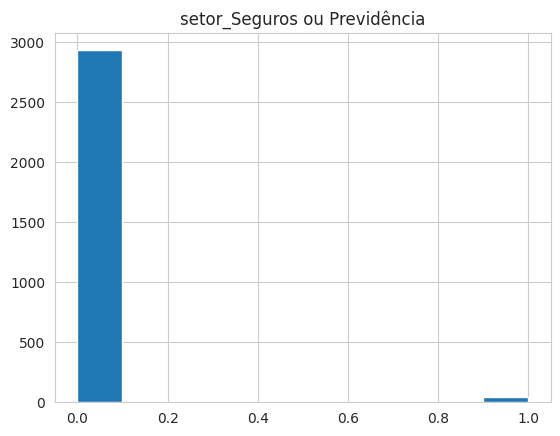

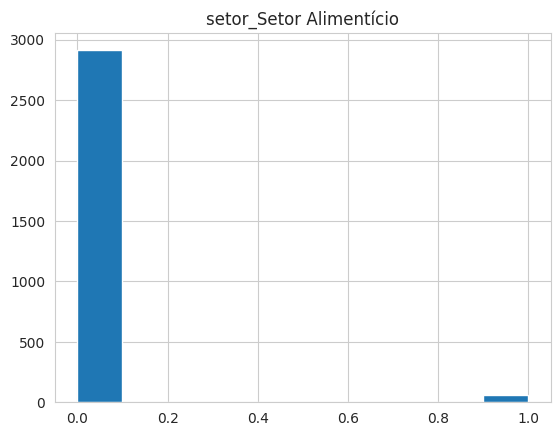

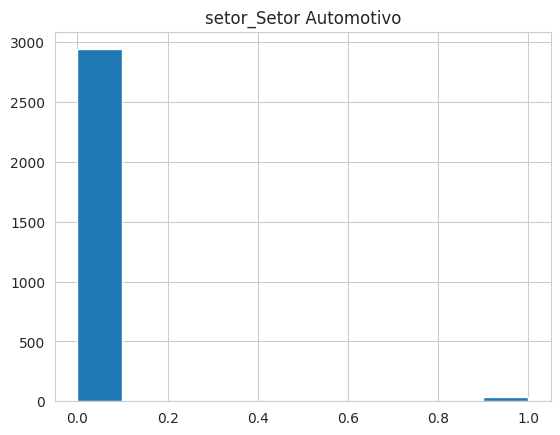

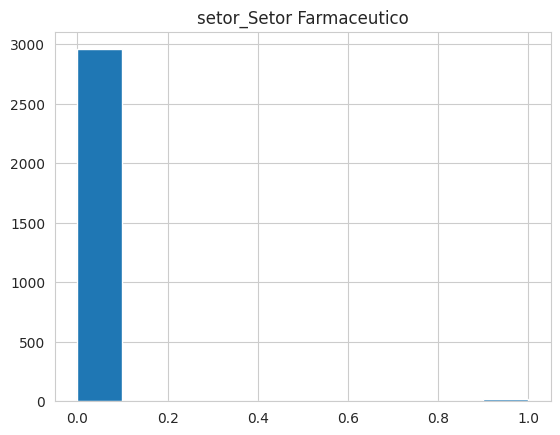

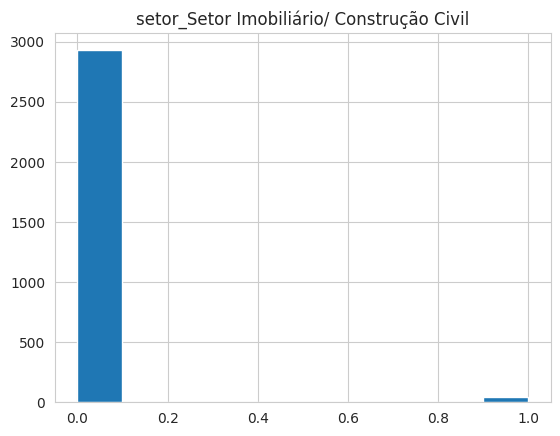

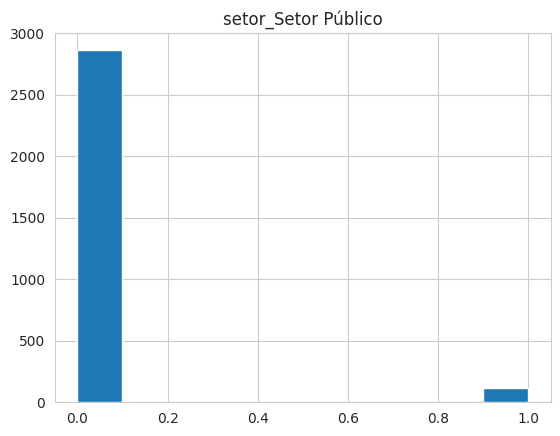

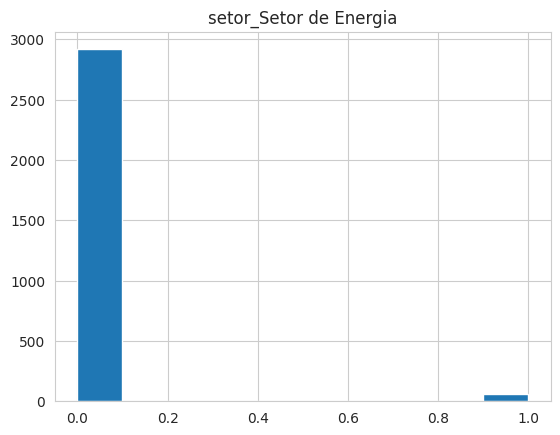

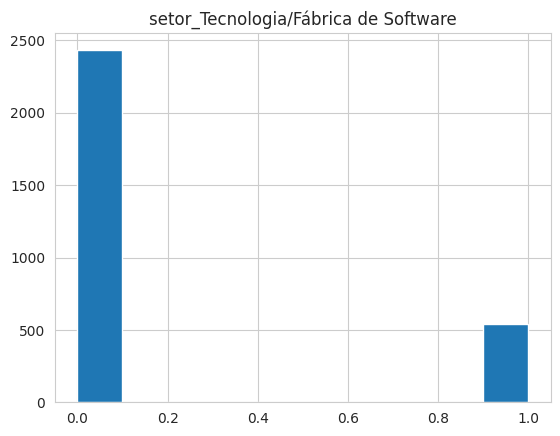

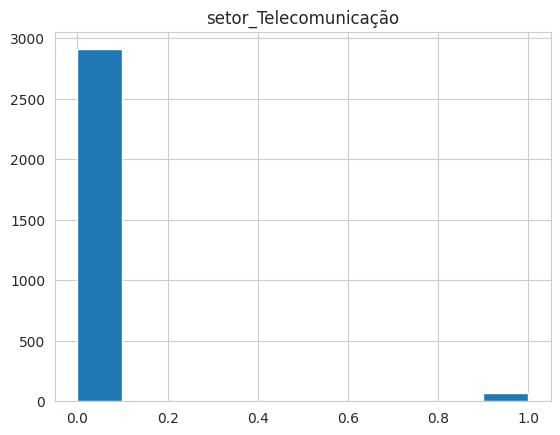

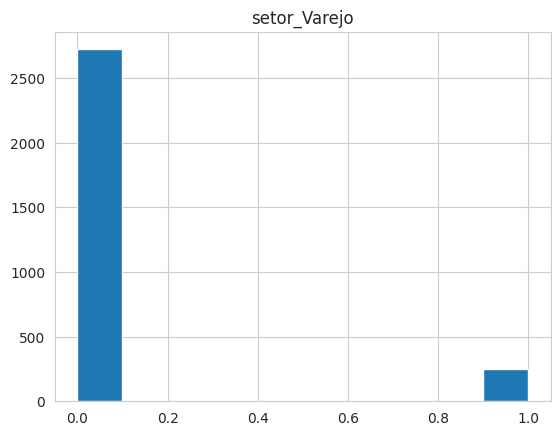

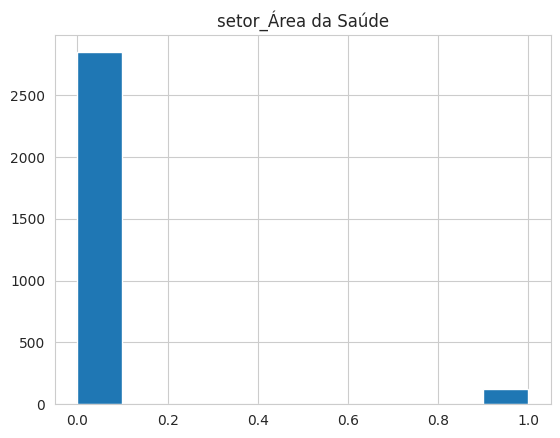

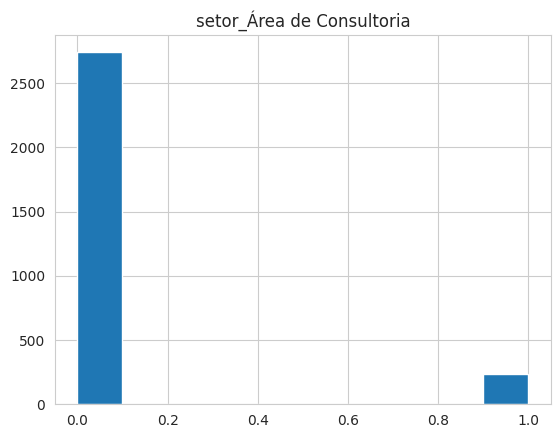

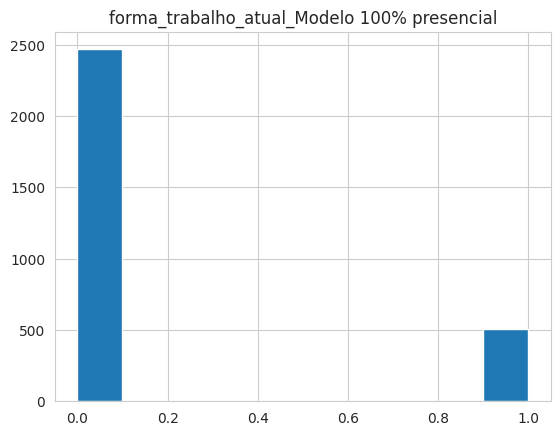

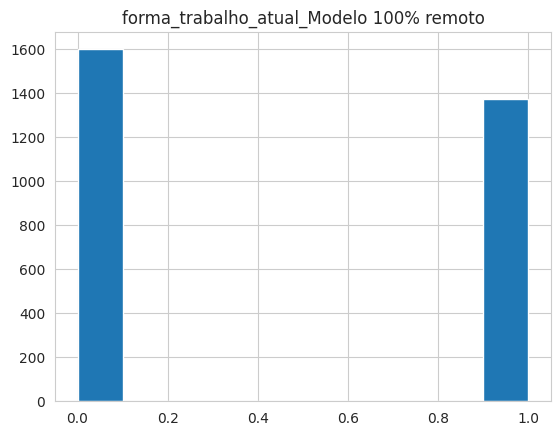

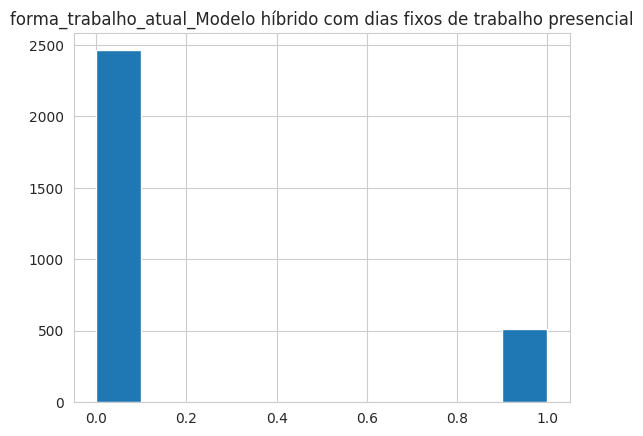

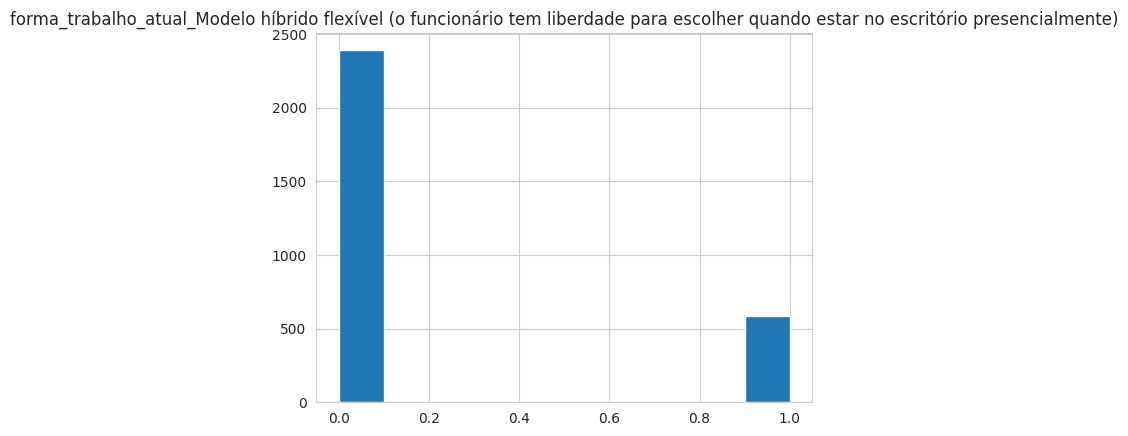

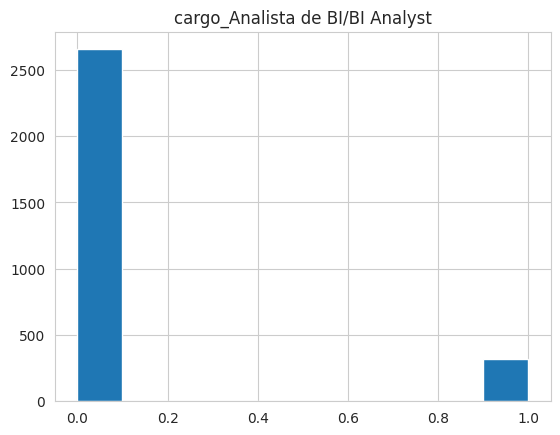

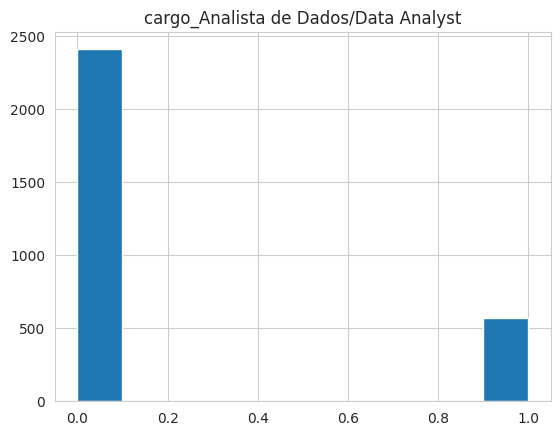

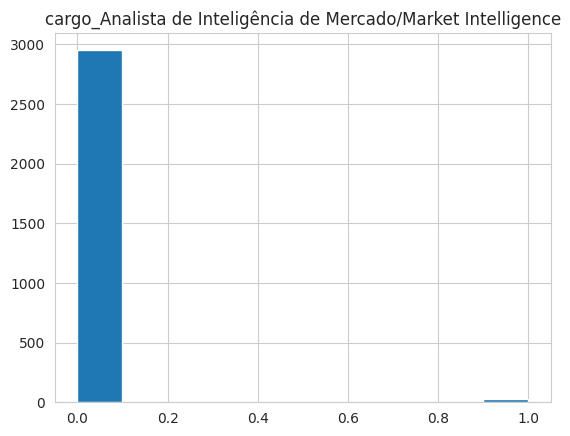

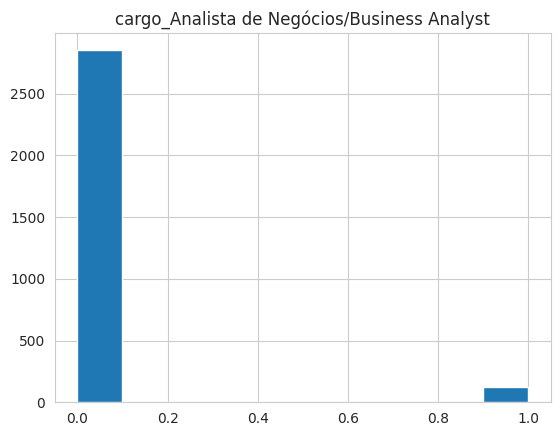

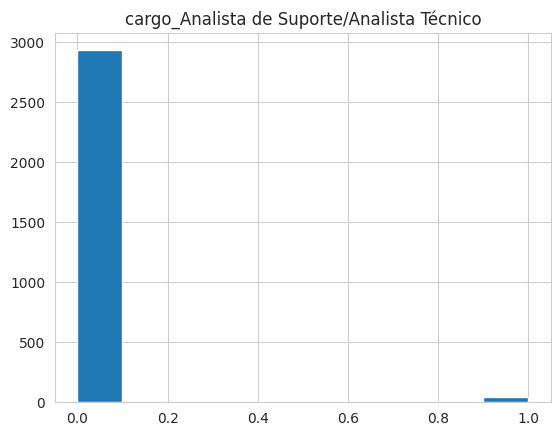

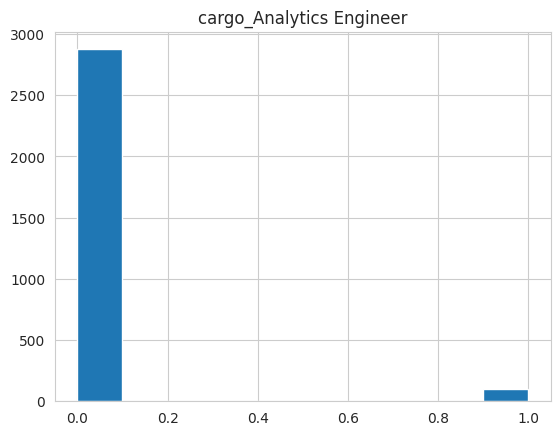

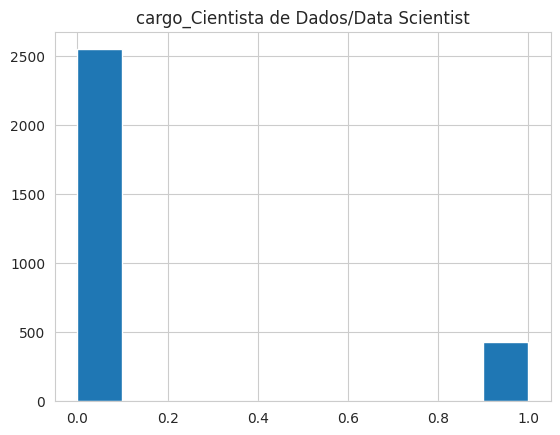

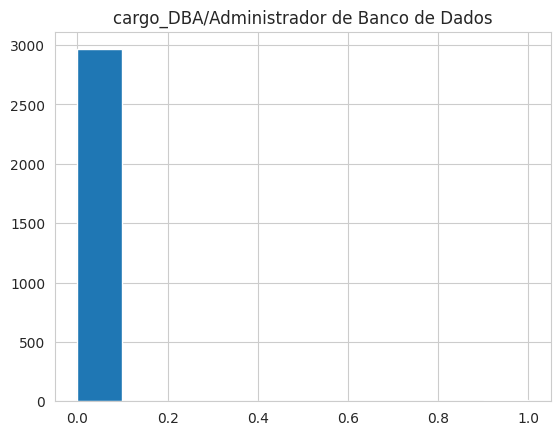

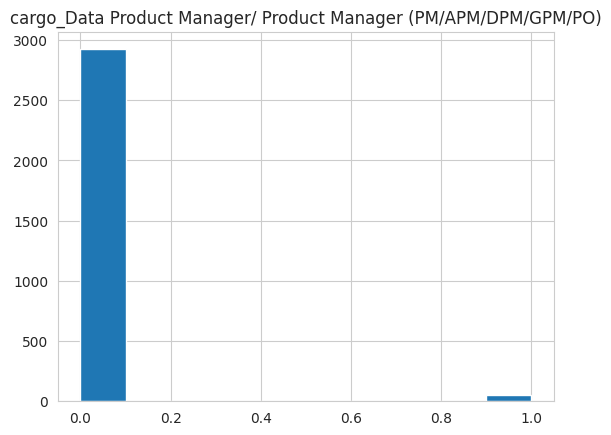

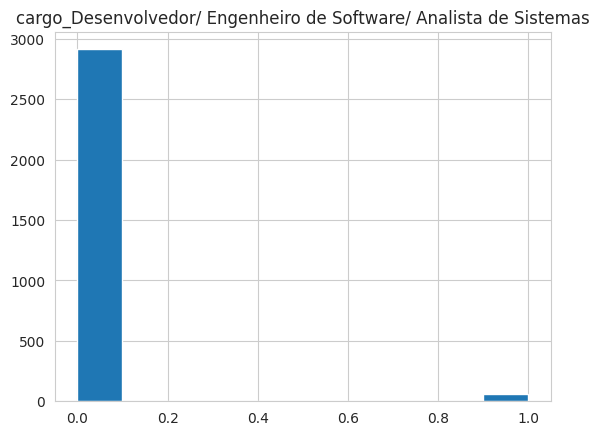

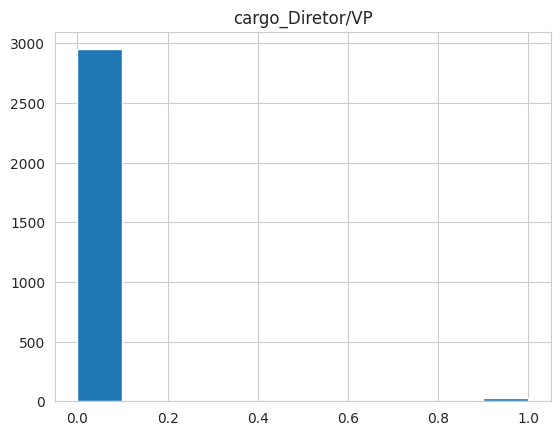

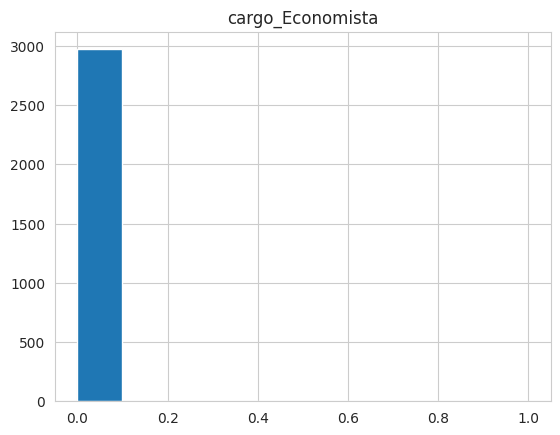

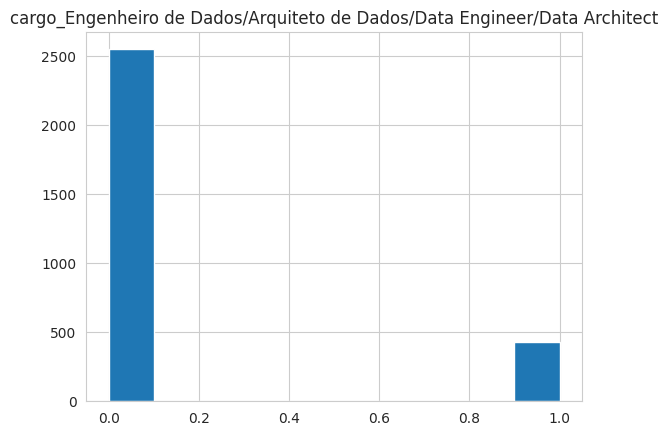

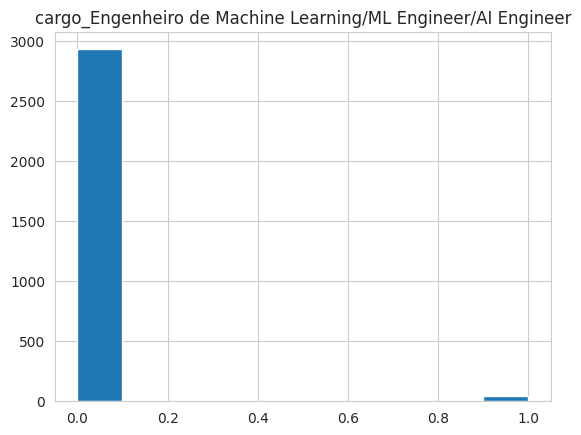

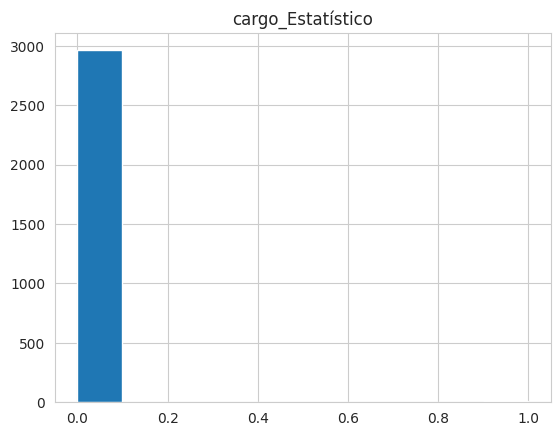

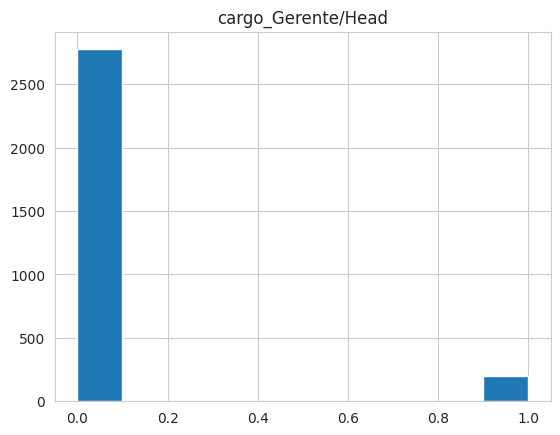

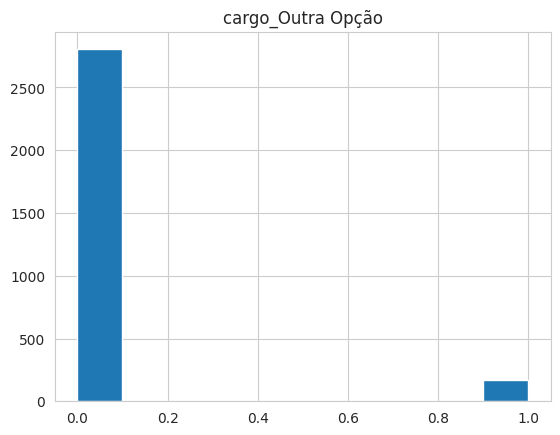

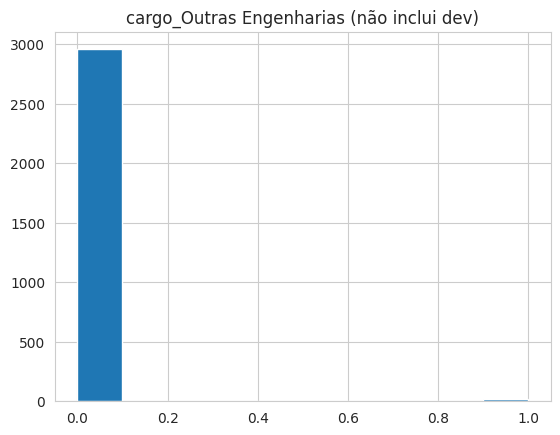

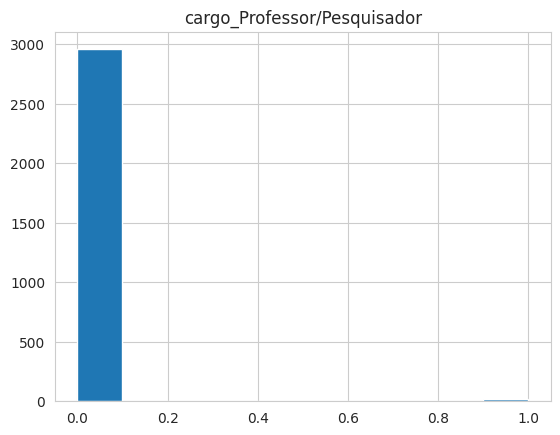

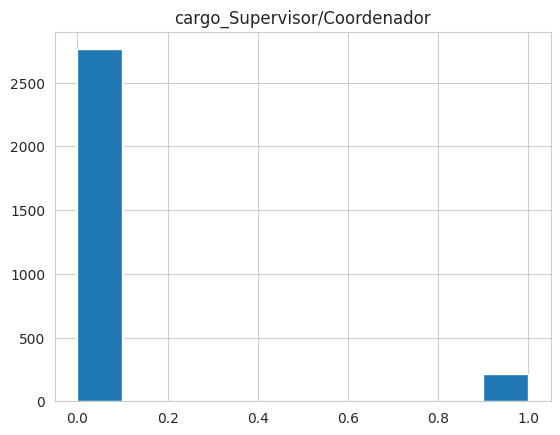

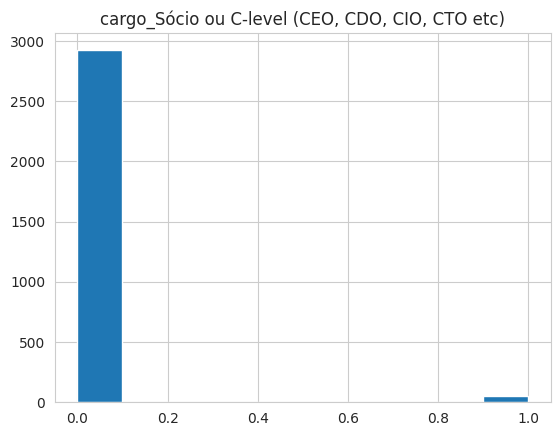

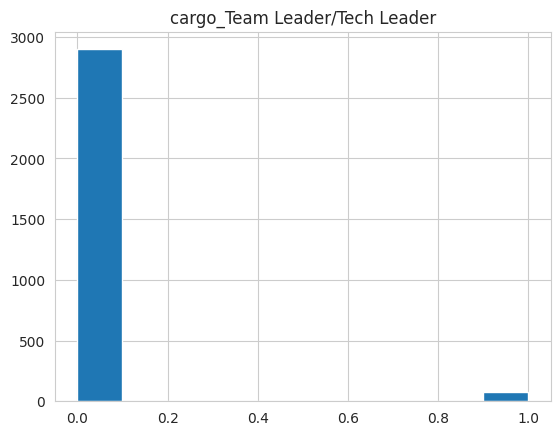

In [ ]:
for cols in df_imputed_train.columns:

  plt.hist(df_imputed_train[cols])
  plt.title(cols)
  plt.show()

(array([1742.,  927.,  201.,   57.,   13.,   10.,    5.,    6.,    4.,
           9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

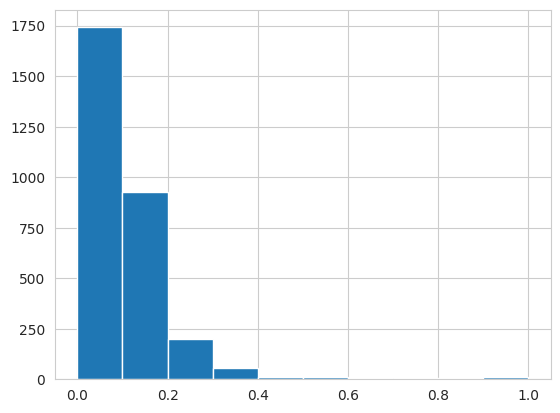

In [ ]:
plt.hist(df_imputed_train['salario'])

(array([ 15., 135., 191., 708., 413., 648., 586., 113.,  73.,  92.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

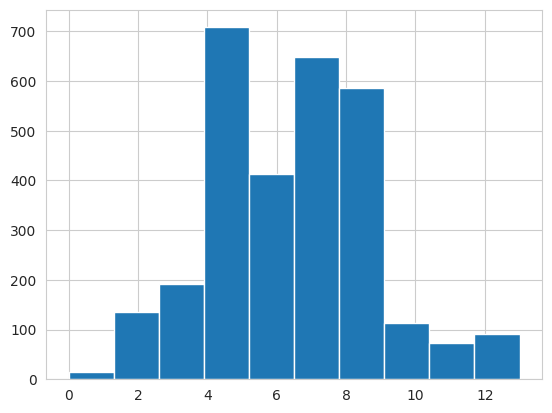

In [ ]:
plt.hist(df_imputed_train['faixa_salarial'])

Nota-se uma diversidade nas distribuições das features a pós a limpeza. A variável target possui uma assimetricidade à direita (salario). No caso da variável target para regressão logística percebe-se maior simetria.

In [ ]:
df_imputed_train.describe()

,idade,mudou_estado,nivel_ensino,numero_funcionarios,nivel_profissional,tempo_exp_dados,tempo_exp_ti,satisfacao_empresa,faixa_salarial,salario,area_formacao_Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde,area_formacao_Ciências Sociais,area_formacao_Computação / Engenharia de Software / Sistemas de Informação/ TI,area_formacao_Economia/ Administração / Contabilidade / Finanças/ Negócios,area_formacao_Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais,area_formacao_Marketing / Publicidade / Comunicação / Jornalismo,area_formacao_Outra opção,area_formacao_Outras Engenharias,area_formacao_Química / Física,situacao_trabalho_Empreendedor ou Empregado (CNPJ),situacao_trabalho_Empregado (CLT),situacao_trabalho_Estagiário,situacao_trabalho_Freelancer,situacao_trabalho_Prefiro não informar,situacao_trabalho_Servidor Público,...,forma_trabalho_atual_Modelo 100% remoto,forma_trabalho_atual_Modelo híbrido com dias fixos de trabalho presencial,forma_trabalho_atual_Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente),cargo_Analista de BI/BI Analyst,cargo_Analista de Dados/Data Analyst,cargo_Analista de Inteligência de Mercado/Market Intelligence,cargo_Analista de Negócios/Business Analyst,cargo_Analista de Suporte/Analista Técnico,cargo_Analytics Engineer,cargo_Cientista de Dados/Data Scientist,cargo_DBA/Administrador de Banco de Dados,cargo_Data Product Manager/ Product Manager (PM/APM/DPM/GPM/PO),cargo_Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas,cargo_Diretor/VP,cargo_Economista,cargo_Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect,cargo_Engenheiro de Machine Learning/ML Engineer/AI Engineer,cargo_Estatístico,cargo_Gerente/Head,cargo_Outra Opção,cargo_Outras Engenharias (não inclui dev),cargo_Professor/Pesquisador,cargo_Supervisor/Coordenador,"cargo_Sócio ou C-level (CEO, CDO, CIO, CTO etc)",cargo_Team Leader/Tech Leader
count,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,...,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000
mean,0.271589,0.792872,3.541358,5.249832,1.457521,3.404169,1.563887,0.719906,6.432078,0.108209,0.020175,0.014795,0.408541,0.150303,0.070276,0.029254,0.050773,0.210155,0.024546,0.119368,0.768998,0.043040,0.008406,0.002354,0.031271,...,0.462004,0.171822,0.196032,0.107263,0.190989,0.008406,0.041358,0.014459,0.033289,0.143241,0.003362,0.017485,0.020175,0.008070,0.001345,0.143578,0.014122,0.003699,0.066577,0.057162,0.005380,0.005716,0.071621,0.017485,0.025219
std,0.143915,0.405317,1.088795,1.949529,0.475635,1.958894,1.914710,0.449121,2.364653,0.100659,0.140622,0.120751,0.491647,0.357428,0.255654,0.168545,0.219572,0.407487,0.154763,0.324275,0.421545,0.202981,0.091314,0.048466,0.174079,...,0.498638,0.377290,0.397060,0.309499,0.393146,0.091314,0.199151,0.119392,0.179419,0.350378,0.057899,0.131091,0.140622,0.089485,0.036656,0.350720,0.118015,0.060715,0.249330,0.232191,0.073163,0.075402,0.257902,0.131091,0.156815
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.176471,1.000000,3.000000,4.000000,1.000000,2.00

**A matriz de correlação já havia sido feita acima e seus problemas relativos à multicolinearidade e vazamentos da variável resposta já foram corrigidos acima.**

3. (0,1 pontos) Divida o seu conjunto de treinamento em dois conjuntos: treinamento e validação. A proporção de divisão pode ser escolhida, mas pense no impacto que isso pode resultar em seu modelo.

  > **Dica:** Defina uma *seed* para seus resultados serem reprodutíveis.

In [ ]:
# TODO: Divisão de treinamento e validação

#A seed já foi utilizada e criada previamente, a qual é ra = 236066 - split realizado anteriormente
X_train_for_regression = df_imputed_train.drop('salario', axis=1)
y_train_for_regression = df_imputed_train['salario']

In [ ]:
# Idem para o conjunto de validação
X_val_for_regression = df_imputed_val.drop('salario', axis=1)
y_val_for_regression = df_imputed_val['salario']

**A divisão já foi feita anteriormente para não haver mistura das amostras de treino e de teste. Preferimos fazer antes do pré processamento ( para que operações como imputação dos dados, entre outras não interferissem)**

## Regressão Linear

Esta parte do trabalho visa prever o valor do salário dos profissionais, descrita pelo atributo `salario`, com base em seus dados demográficos e informações de carreira.

O atributo alvo nesta etapa é o atributo `salario`. Portanto, não utilize os atributos `salario` e `faixa_salarial` como *features* dos seus modelos, apenas para o cálculo da função de custo durante o treinamento e a validação.

### Atividades

1. (0,1 pontos) Faça a seleção das features mais importantes para o treinamento da sua regressão linear, com base em sua análise exploratória.

In [ ]:
#TODO: Seleção de features.

# A seleção geral já foi feita previamente, em conjunto com o pré processamento de limpeza
# Basta apenas selecionar a variável alvo corretamente
X_train_for_regression_linear = df_imputed_train.drop(['salario','faixa_salarial'], axis=1)
y_train_for_regression_linear = df_imputed_train['salario']

In [ ]:
X_val_for_regression_linear = df_imputed_val.drop(['salario','faixa_salarial'], axis=1)
y_val_for_regression_linear = df_imputed_val['salario']

2. (1,75 pontos) Implemente e execute a regressão linear.

  Faça uma classe `LinearRegression` capaz de encontrar uma regressão utilizando dois métodos: **descida do gradiente** e a **equação normal**.

  Para a otimização por **descida do gradiente**, guarde o histórico da função de custo por época e retorno este histórico após a execução do ajuste. Além disso, utilize uma learning rate de `0.01` nesta etapa.

  > **Observações:** Inicie randomicamente sua regressão linear e lembre-se de não utilizar dados de teste no treinamento.

  Lembre-se que:

  > A hipótese da regressão linear é: $ h_\theta(x) = \theta^Tx$.
  >
  > E, o objetivo da regressão linear é minimizar a função de custo Root Mean Squared Error (RMSE):
  >
  > $$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $$
  >
  > Para minimizar o custo $J(\theta)$, o algoritmo de descida do gradiente realiza uma atualização nos parâmetros do modelo a cada iteração:
  >
  > $$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$
  >
  > onde $j$ é o índice do parâmetro a ser atualizado (atualizando simultaneamente $\theta_j$ para todos os $j$) e $\alpha$ é a taxa de aprendizado.

Estimating by GRADIENT_DESCENT


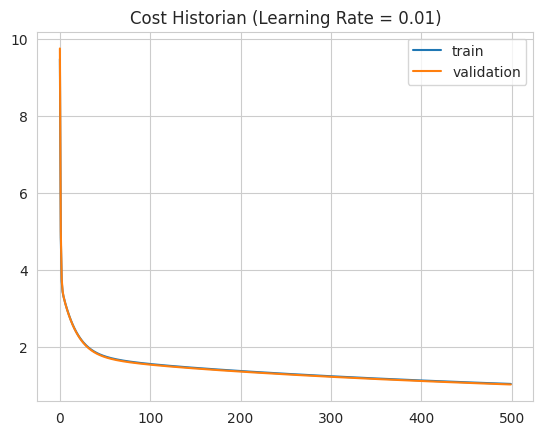

Last train_cost: 1.0518619120275998 | Last val_cost: 1.0376314457918407


In [ ]:
# TODO: Regressão Linear. Implemente sua solução. Você não pode usar bibliotecas como scikit-learn, Keras/TensorFlow, ou PyTorch.

import numpy as np
from enum import Enum

import matplotlib.pyplot as plt

class OptimizationMethod(Enum):
    GRADIENT_DESCENT = 0
    NORMAL_EQUATION = 1

class InitType(Enum):
    ZERO = 0
    RAND = 1

class LinearRegression:

    def __init__(self):
        self.bias = None
        self.theta = None

    def initialization(self, theta_size, type=InitType.ZERO):
        if(type == InitType.ZERO):
            self.bias = 0
            self.theta = np.zeros(theta_size)
        elif(type == InitType.RAND):
            self.bias = float(np.random.randn(1)[0])
            self.theta = np.random.randn(theta_size)
        else:
            raise Exception(f'Initialization type {type} not defined!')

    def predict(self, X):
        return np.dot(X, self.theta)  # Usa diretamente os parâmetros theta

    def cost(self, predictions, y):
        m = len(predictions)
        return np.sqrt((1/(m)) * np.sum((predictions - y)**2))

    def fit(self, X, y, X_val=None, y_val=None, method=OptimizationMethod.GRADIENT_DESCENT, init_type=InitType.ZERO, learning_rate=0.01, max_iterations=1000):

        train_cost = []
        val_cost = []

        if method == OptimizationMethod.GRADIENT_DESCENT:
            print(f'Estimating by {method.name}')

            m, theta_size = X.shape
            self.initialization(theta_size, init_type)

            for it in range(max_iterations):
                train_pred = self.predict(X)
                train_cost.append(self.cost(train_pred, y))

                if (X_val is not None) and (y_val is not None):
                    val_pred = self.predict(X_val)
                    val_cost.append(self.cost(val_pred, y_val))

                dbias = (1/m) * np.sum(train_pred - y)
                dtheta = (1/m) * np.dot(train_pred - y, X)
                self.bias = self.bias - learning_rate * dbias
                self.theta = self.theta - learning_rate * dtheta

        elif method == OptimizationMethod.NORMAL_EQUATION:
            print(f'Estimating by {method.name}')

            params = np.linalg.inv(X.T @ X) @ X.T @ y
            self.theta = params  # Armazena todos os parâmetros diretamente em theta
            self.bias = 0  # Define bias como 0 já que estamos usando todos os parâmetros diretamente

            train_pred = self.predict(X)
            train_cost.append(self.cost(train_pred, y))

            if (X_val is not None) and (y_val is not None):
                val_pred = self.predict(X_val)
                val_cost.append(self.cost(val_pred, y_val))

        else:
            raise Exception(f'Method {method} not defined!')

        return train_cost, val_cost


def plot_cost_historian(train_cost, val_cost=[], title='Cost historian'):
    x = range(len(train_cost))
    plt.plot(x, train_cost, label='train')
    if val_cost != []:
        plt.plot(x, val_cost, label='validation')
    plt.title(title)
    plt.legend()
    plt.show()

model = LinearRegression()

lr = 0.01

train_cost, val_cost = model.fit(
    X_train_for_regression_linear, y_train_for_regression_linear,
    X_val_for_regression_linear, y_val_for_regression_linear,
    init_type=InitType.RAND, learning_rate=lr, max_iterations=500)

plot_cost_historian(train_cost, val_cost, f'Cost Historian (Learning Rate = {lr})')
print(f'Last train_cost: {train_cost[-1]} | Last val_cost: {val_cost[-1]}')

> **Quais foram suas conclusões? (1-2 parágrafos)**




*De acordo com os resultados obtidos nota-se que o algoritmo construido from_scratch demonstrou uma suavidade em minimizar a métrica de loss( no caso RMSE). Percebe-se uma queda acentuada logo nas primeiras 50 epocas e uma queda mais linear nas restantes, tanto para treino quanto para teste*

3. (0,75 pontos) Experimente diferentes valores de *learning rates* para a descida de gradiente (GD). Plote o histórico da função de custo (função de custo vs. número de épocas) no conjunto de treinamento e no de validação para cada experimento.



Estimating by GRADIENT_DESCENT


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


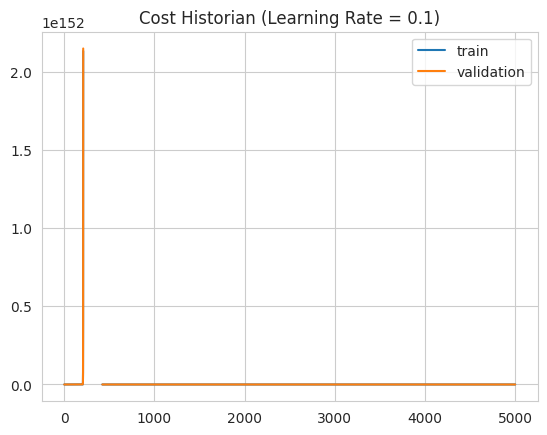

Last train_cost: 0.0 | Last val_cost: 0.0
Estimating by GRADIENT_DESCENT


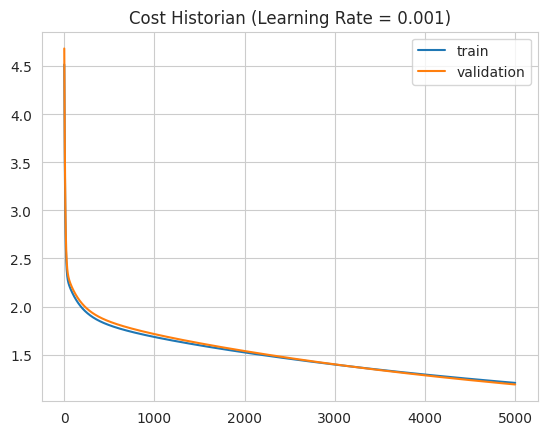

Last train_cost: 1.2049207969490092 | Last val_cost: 1.1884117591869736
Estimating by GRADIENT_DESCENT


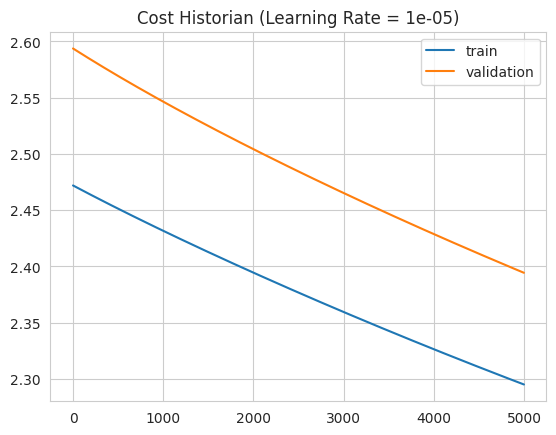

Last train_cost: 2.2950528102731913 | Last val_cost: 2.394355726737643


In [ ]:
# TODO: Descida do gradiente (GD) com 3 diferentes learning rates.
np.random.seed(ra)
model = LinearRegression()

for lr in [0.1, 0.001, 0.00001]:

    train_cost, val_cost = model.fit(
        X_train_for_regression_linear, y_train_for_regression_linear,
        X_val_for_regression_linear, y_val_for_regression_linear,
        init_type=InitType.RAND, learning_rate=lr, max_iterations=5000)

    plot_cost_historian(train_cost, val_cost, f'Cost Historian (Learning Rate = {lr})')
    print(f'Last train_cost: {train_cost[-1]} | Last val_cost: {val_cost[-1]}')

> **Quais foram suas conclusões? (1-2 parágrafos)**




*De acordo com os experimentos realizados com 3 valores distintos de learning-rate ( um bem alto, um moderaod e um bem menor) percebe-se que no primeiro caso o learning rate se mostrou demasiadamente alto e o gráfico mais caótico reflete isso. No caso do learning rate menor percebeu-se também uma inadequaçõo desse valor, mostranodo divergências em aproximar treino e teste. E, por fim, no learning rate do meio (lr=0.001) vimos que a descida é mais suave, tanto para treino e teste, configurando como o melhor dentre os testados até o momento*

 4. (0,25 pontos) Compare o seu melhor experimento baseado em GD com a sua implementação da equação normal.

In [ ]:
# TODO: Compare as implementações
np.random.seed(ra)
model = LinearRegression()
train_cost, val_cost = model.fit(
    X_train_for_regression_linear.to_numpy(), y_train_for_regression_linear.to_numpy(),
    X_val_for_regression_linear.to_numpy(), y_val_for_regression_linear.to_numpy(), method=OptimizationMethod.NORMAL_EQUATION)


Estimating by NORMAL_EQUATION


In [ ]:
train_cost,val_cost

([0.49021003969802646], [0.45970337418234286])

In [ ]:
# Gradiente Descendente com o lr =0.001
# Last train_cost: 1.2049207969490092 | Last val_cost: 1.1884117591869736


> **Quais foram suas conclusões? (1-2 parágrafos)**




Comparando-se os resultados nota-se que o modelo via gradiente descendente aproximou com alta certeza as métricas de RMSE em relação à mesma métrica via Quadrados Mínimos (Equações normais). Analisando-se tanto os scores de treino e validacão percebeu-se que nos métodos via gradiente atingiram um platô de forma mais suave com o learning rate especificado. Ao mesmo tempo, via equações normais alcançou-se um valor pouco mais mas ainda próximo do score RMSE via gradiente ( método iterativo).

5. (1,25 pontos) Implementa e execute duas regressões lineares utilizando sklearn:

  1. Execute uma regressão com `sklearn.linear_model.SGDRegressor`, que utiliza descida do gradiente minimizando uma função de custo regularizada.
  2. Execute uma regressão com `sklearn.linear_model.LinearRegression`, que utiliza o método da equação normal.

  Compare os resultados obtidos com as suas implementações (de GD e da equação normal).

  Ou seja, compare o `sklearn.linear_model.SGDRegressor` com a sua implementação da descida do gradiente e o `sklearn.linear_model.LinearRegression` com a sua implementação da equação normal.

  > **Observação:** Utilize uma learning rate igual a algum dos experimentos que já fez para realizar uma comparação justa.


In [ ]:
# TODO: Regressão Linear. Faça a regressão novamente, agora utilizando o sklearn.linear_model.SGDRegressor e sklearn.linear_model.LinearRegression.
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error
np.random.seed(ra)
model_sgd_best = SGDRegressor(max_iter=1000, eta0=0.01,random_state=ra,learning_rate='constant',penalty='l2', early_stopping=True,tol=1e-4,loss='squared_error')
model = model_sgd_best
model.fit(X_train_for_regression_linear, y_train_for_regression_linear)
y_predict_gd = model.predict(X_val_for_regression_linear)
rmse_lin_pack = np.sqrt(mean_squared_error(y_val_for_regression_linear, y_predict_gd))
rmse_lin_pack

0.09808254843450735

In [ ]:
np.random.seed(ra)
lm = LinearRegression(fit_intercept=False)
lm.fit(X_train_for_regression_linear, y_train_for_regression_linear)
y_predict_lm = lm.predict(X_val_for_regression_linear)
rmse_QM_pack = np.sqrt(mean_squared_error(y_val_for_regression_linear, y_predict_lm))
rmse_QM_pack

0.07695932993699597

> **Quais foram suas conclusões? (1-2 parágrafos)**




*Comparando-se os métodos implementados manualmente percebe-se uma pequena dierença.No caso do SGDRegressor via sklearn em relação à implementação de regressão linear por método iterativo via gradiente nota-se uma diferença no RMSE, sendo 0.09808254843450735 para o via sklearn e de 1.1884117591869736 para o método manual. Nesse caso entende-se que por se tratar de um método analítico fatores aleatoriedada de caminhada do gradiente e outras variáveis estocásticas podem criar valores distintos, mas ainda assim ambos são relativamente baixos.

Já na comparação da implementação de equações normais via sklearn e manual percebeuse-uma diferença, o que não era esperado- já que por possuir forma fechada teoricamente os valores deveriam se idênticos. Depois de revisar o código não encontramos falhas plausíveis na nossa implementação, acredita-se que a presença ou não do bias pode ter influenciado nisso.*

6. (0,4 ponto) Às vezes, precisamos de alguma função mais complexa para fazer uma boa predição. Elabore e avalie um modelo de Regressão Polinomial.

Decidiu-se usar a polinomial apenas nas features puramente numéricas (não faria muito sentido elevar ao quadrado uma categórica codificada com valores binários)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polinomial = PolynomialFeatures(degree=2, include_bias=False)

X_train_transformed_train = X_train_for_regression_linear.copy()
x_poly_only_for_pure_numeric_train = polinomial.fit_transform(X_train_transformed_train['idade'].values.reshape(-1, 1))

X_train_transformed_val = X_val_for_regression_linear.copy()
x_poly_only_for_pure_numeric_val = polinomial.fit_transform(X_train_transformed_val['idade'].values.reshape(-1, 1))


In [ ]:
df_polinomial_train = pd.DataFrame(x_poly_only_for_pure_numeric_train,columns = ['idade_1','idade_2'])

X_train_for_polinomial = X_train_for_regression_linear.copy()

X_train_for_polinomial['idade'] = df_polinomial_train['idade_1']
X_train_for_polinomial['idade_2'] = df_polinomial_train['idade_2']


In [ ]:
df_polinomial_val = pd.DataFrame(x_poly_only_for_pure_numeric_val,columns = ['idade_1','idade_2'])

X_val_for_polinomial = X_val_for_regression_linear.copy()

X_val_for_polinomial['idade'] = df_polinomial_val['idade_1']
X_val_for_polinomial['idade_2'] = df_polinomial_val['idade_2']


In [ ]:
# TODO: Regressão polinomial. Está liberado utilizar scikit-learn.
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(ra)

model_polinomial = LinearRegression().fit(X_train_for_polinomial, y_train_for_regression_linear)

y_pred_polinomial = model_polinomial.predict(X_val_for_polinomial)

rmse = np.sqrt(mean_squared_error(y_val_for_regression_linear, y_pred_polinomial))
rmse


0.07716558969741942

> **Quais foram suas conclusões? (1-2 parágrafos)**




*Tentou-se num primeiro momento aplicar o polinomial feature para todas as colunas, mas após um RMSE gigantesco reavaliou-se o caso e decidiu-se aplicar apenas nas variáveis numéricas. Dessa, forma o valor foi bem parecido com os outros algoritmos.*

## Regressão Logística

Esta parte do trabalho visa prever a faixa salarial dos profissionais, descrita pelo atributo `faixa_salarial`, com base em seus dados demográficos e informações de carreira. Portanto, não utilize os atributos `salario` e `faixa_salarial` como *features* dos seus modelos, apenas para o cálculo da função de custo durante o treinamento e a validação.

### Atividades

1. (0,1 pontos) Faça a seleção das features mais importantes para o treinamento da sua regressão logística, com base em sua análise exploratória.

In [ ]:
# TODO: Selecione de features.
# Aqui seguirá a mesma estrurura da regress'ao linear, mas o target  'salário' será substituído por 'faixa_salarial'

X_train_for_regression_logistic = df_imputed_train.drop(['salario','faixa_salarial'], axis=1)

y_train_for_regression_logistic = df_imputed_train['faixa_salarial']

In [ ]:
X_val_for_regression_logistic = df_imputed_val.drop(['salario','faixa_salarial'], axis=1)

y_val_for_regression_logistic = df_imputed_val['faixa_salarial']

2. (1,0 pontos) Faça uma Regressão Logística Multinomial. Ela é uma generalização da Regressão Logística para o caso em que queremos lidar com várias classes.

    Use a classe `sklearn.linear_model.SGDClassifier`, passando o parâmetro `loss="log_loss"` no construtor, para criar uma Regressão Logística a ser otimizada por descida do gradiente.

    Experimente diferentes valores de learning rate e avalie o impacto desse hiperparâmetro no treinamento do modelo.

In [ ]:
# TODO: Regressão logística multinomial. Utilize a classe sklearn.linear_model.SGDClassifier do scikit-learn.
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
model = SGDClassifier(loss='log_loss',eta0=.001, max_iter=1000, random_state=ra,learning_rate='adaptive',penalty='l1',n_iter_no_change=5,alpha=.001)

model.fit(X_train_for_regression_logistic, y_train_for_regression_logistic)

y_pred = model.predict(X_val_for_regression_logistic)

accuracy_score(y_val_for_regression_logistic, y_pred)

0.3293010752688172

In [ ]:
print(confusion_matrix(y_val_for_regression_logistic, y_pred))

[[  0   3   0   0   0   0   0   0   0   0   0   0   0]
 [  0  24   2   0  11   0   0   0   0   1   0   0   1]
 [  0  11   2   0  15   2   4   0   0   0   0   0   0]
 [  0   0   0   0  51   1   9   1   0   0   0   0   0]
 [  0   0   1   0  71   5  26   1   0   0   1   0   0]
 [  0   0   0   0  50   9  42   5   0   0   0   0   0]
 [  0   0   1   0  23   6 108   8   1   1   0   0   0]
 [  0   0   0   0   3   4  82  27   1   2   0   0   0]
 [  0   0   0   0   0   0  33  19   2   1   0   0   0]
 [  0   0   0   0   1   0  18  10   1   2   0   0   0]
 [  0   0   0   0   0   1  11   3   1   2   0   0   0]
 [  0   0   0   0   0   0   6   4   2   1   0   0   0]
 [  0   0   1   0   0   0   3   5   1   0   0   0   0]]


> **Quais foram suas conclusões? (1-2 parágrafos)**



* As conclusões são que mesmo tendo testadas várias configurações de (hiper)parâmetros, como o learning rate o modelo alcançou um baixo poder de predição. Isso se vê pela baixa acurácia, baixao F1-Score( refletido pela baixa precisão e recall). Além disso, ao se notar a a matriz de confusão percebe-se que há bastante erros em classificar certas classes, algumas mais que outras.

Dessa forma, o algoritmo não está bom e seria recomendado olhar mais profundamente complexificar o modelo, testar novos hiper-parâmetros e revisitar os dados.*

3. (0,75 ponto) Faça um gráfico da função de custo vs. número de épocas, em relação ao conjunto de treinamento e ao conjunto de validação. Também faça um gráfico, de mesma estrutura, descrevendo a acurácia vs. número de época.

    Como é o comportamento do modelo? O modelo está aprendendo?

Para realizar o requisitado, teremos que utilizar o 'partial_fit' para computar os valores por epoch via gradiente desendente

In [ ]:
# TODO: Plote os gráficos de loss / acurácia vs. número de épocas. Você pode usar as bibliotecas scikit-learn, seaborn, matplotlib, etc.
from plotly import graph_objects as go
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, log_loss
import numpy as np

train_rmse_log,val_rmse_loss = [],[]
train_accuracy,val_accuracy = [],[]

model_logistic_best = SGDClassifier(loss='log_loss', eta0=0.001, max_iter=1, random_state=42, learning_rate='adaptive',
                      penalty='l1', n_iter_no_change=5, alpha=0.001, warm_start=True)

model = model_logistic_best

iters = 50 # Testando para um conjunto de 50 epochs

for iter in range(iters):
    # Treinamento usando partial_fit
    model.partial_fit(X_train_for_regression_logistic, y_train_for_regression_logistic, classes=np.unique(y_train_for_regression_logistic))

    y_train_pred,y_val_pred = model.predict(X_train_for_regression_logistic),model.predict(X_val_for_regression_logistic)

    # Cálculo do custo (log_loss) para treinamento e validação
    train_rmse_log.append(log_loss(y_train_for_regression_logistic, model.predict_proba(X_train_for_regression_logistic))), train_accuracy.append(accuracy_score(y_train_for_regression_logistic, y_train_pred))
    val_rmse_loss.append(log_loss(y_val_for_regression_logistic, model.predict_proba(X_val_for_regression_logistic))),val_accuracy.append(accuracy_score(y_val_for_regression_logistic, y_val_pred))


Text(0, 0.5, '(Log Loss)')

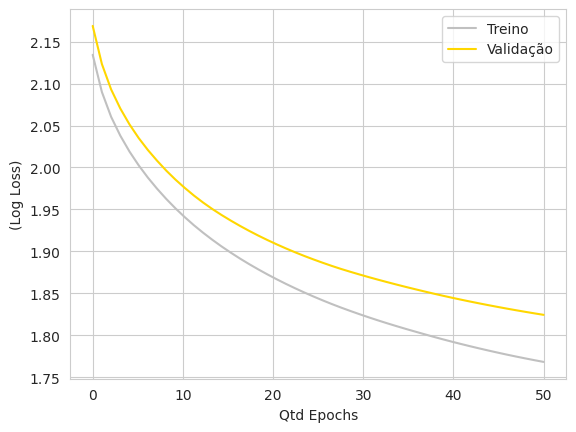

In [ ]:
# Gráfico da função de custo vs. número de épocas
sns.set_style("whitegrid")

intervalo = np.linspace(0, 50)
plt.plot(intervalo, train_rmse_log, label='Treino', linestyle='-',color='silver')
plt.plot(intervalo, val_rmse_loss, label='Validação',linestyle='-',color='gold')

plt.legend()
plt.xlabel('Qtd Epochs')
plt.ylabel('(Log Loss)')

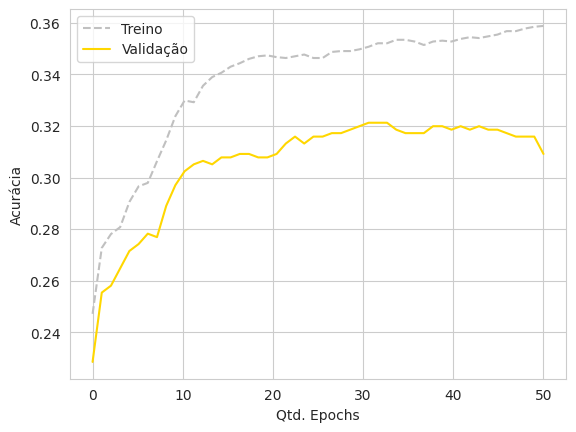

In [ ]:
# Gráfico
intervalo = np.linspace(0, 50)
plt.plot(intervalo, train_accuracy, label='Treino', linestyle='--',color='silver')
plt.plot(intervalo, val_accuracy, label='Validação',linestyle='-',color='gold')
plt.legend()
plt.xlabel('Qtd. Epochs')
plt.ylabel('Acurácia')
plt.show()

> **Quais foram suas conclusões? (1-2 parágrafos)**




*De acordo com os resultados, tanto acuracia e a loss caíram ao longo das epocas. Em contrapartida percebe-se ue existe uma diferença entre os conjuntos de treino e validação, indicando um limite de detectar padrões nos dados disponíveis. Ao mesmo tempo percebe-se que o classificador manteve a dificuldade em minimizar a métrica uma vez que a acurácia manteve-se relativamente ruim.*

> Adicionar aspas



4. (0,9 pontos) Faça pelo menos 2 gráficos que visualizem as fronteiras de decisão entre duas *features*. Por exemplo, você pode fazer um gráfico da fronteira de decisão entre os atributos `tempo_exp_dados` e `satisfacao_empresa`, caso tenha utilizado essas *features*. Verifique se está fazendo o plot para atributos relevantes utilizados em seu modelo.

    > **Observação:** [Este tutorial](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_iris.html#sphx-glr-auto-examples-linear-model-plot-sgd-iris-py) do scikit-learn demonstra como extrair essas informações do `sklearn.linear_model.SGDClassifier`.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


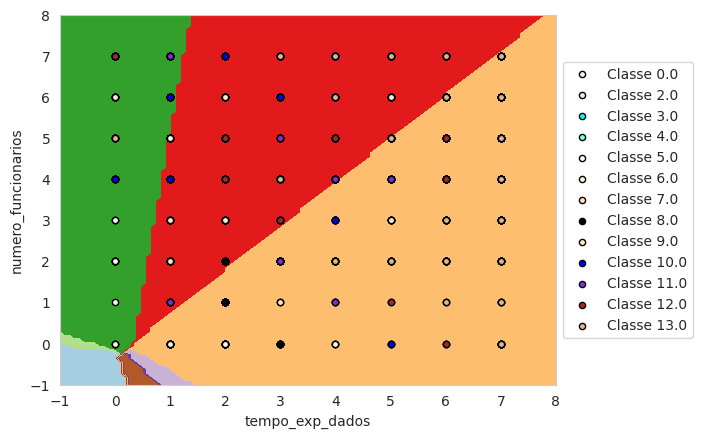

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.colors as mcolors

np.random.seed(ra)
features_1 = ['tempo_exp_dados', 'numero_funcionarios'] # Features a serem usadas
X1 = X_train_for_regression_logistic[features_1].to_numpy()
y = y_train_for_regression_logistic.to_numpy()

clf = SGDClassifier(loss='log_loss', eta0=0.001, max_iter=1, random_state=42, learning_rate='adaptive',
                      penalty='l1', n_iter_no_change=5, alpha=0.001, warm_start=True).fit(X1,y)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X1,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    xlabel=features_1[0],
    ylabel=features_1[1]
)
plt.axis("tight")

colors = list(mcolors.CSS4_COLORS.items())[:13]
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(
        X1[idx, 0],
        X1[idx, 1],
        c=color[0],
        label=f'Classe {i}',
        edgecolor="black",
        s=20,
    )

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


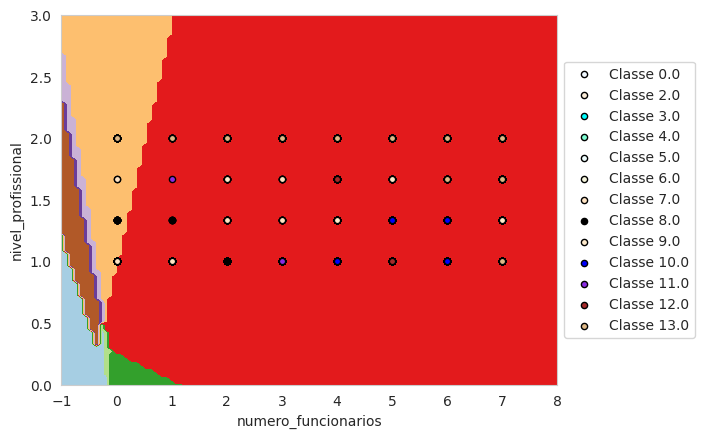

In [ ]:
np.random.seed(ra)
features_1 = ['numero_funcionarios', 'nivel_profissional'] # Features a serem usadas

X1 = X_train_for_regression_logistic[features_1].to_numpy()
y = y_train_for_regression_logistic.to_numpy()

clf = SGDClassifier(loss='log_loss', eta0=0.001, max_iter=1, random_state=42, learning_rate='adaptive',
                      penalty='l1', n_iter_no_change=5, alpha=0.001, warm_start=True).fit(X1,y)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X1,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    xlabel=features_1[0],
    ylabel=features_1[1]
)
plt.axis("tight")

colors = list(mcolors.CSS4_COLORS.items())[:13]
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(
        X1[idx, 0],
        X1[idx, 1],
        c=color[0],
        label=f'Classe {i}',
        edgecolor="black",
        s=20,
    )

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

> **Quais foram suas conclusões? (1-2 parágrafos)**




De acordo com as formas de visualização percebe um padrão de alguns dados e uma dificuldade do algoritmo em prever corretamente a classe tanto entre os planos, o que se traduz na distribuição dos pontos. Refletindo assim a dificuldade de se aprender os padrões de separação entre as multiplas classes.

5. (0,75 pontos) Avalie os resultados do seu modelo, utilizando métricas de classificação que achar relevante. Plote a matriz de confusão e analise os resultados.

In [ ]:
# TODO: Avalie o seu modelo de classificação. Você pode usar as bibliotecas scikit-learn, seaborn, matplotlib, etc.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
np.random.seed(ra)
accuracy = accuracy_score(y_val_for_regression_logistic, y_pred)
precision = precision_score(y_val_for_regression_logistic, y_pred, average='weighted')
recall = recall_score(y_val_for_regression_logistic, y_pred, average='weighted')
f1 = f1_score(y_val_for_regression_logistic, y_pred, average='weighted')

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Acurácia: 0.3293010752688172
Precisão: 0.27637168584327343
Recall: 0.3293010752688172
F1 Score: 0.25616559435034403


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
conf_matrix = confusion_matrix(y_val_for_regression_logistic, y_pred)
conf_matrix

array([[  0,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  24,   2,   0,  11,   0,   0,   0,   0,   1,   0,   0,   1],
       [  0,  11,   2,   0,  15,   2,   4,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  51,   1,   9,   1,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,  71,   5,  26,   1,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,  50,   9,  42,   5,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,  23,   6, 108,   8,   1,   1,   0,   0,   0],
       [  0,   0,   0,   0,   3,   4,  82,  27,   1,   2,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  33,  19,   2,   1,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,  18,  10,   1,   2,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,  11,   3,   1,   2,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   6,   4,   2,   1,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   3,   5,   1,   0,   0,   0,   0]])

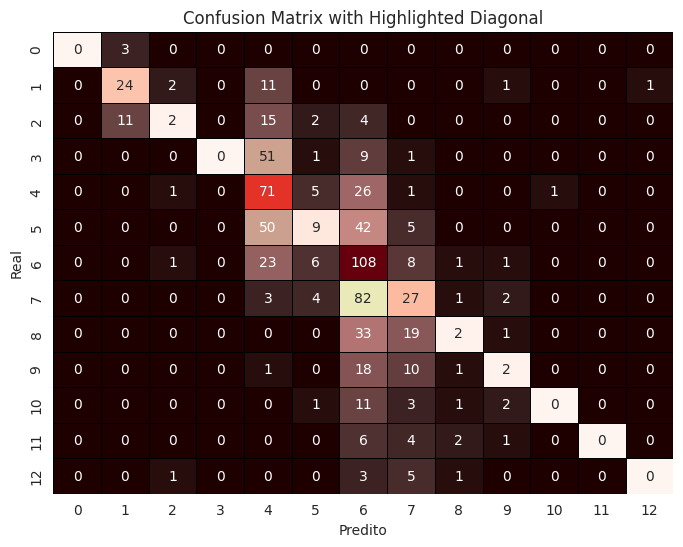

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink', cbar=False, linecolor='white')
sns.heatmap(conf_matrix, mask=~(np.eye(len(conf_matrix), dtype=bool)), annot=True, fmt='d', cmap='Reds', cbar=False, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix with Highlighted Diagonal')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

> **Quais foram suas conclusões? (1-2 parágrafos)**


*Escreva as conclusões aqui.*

No geral as métricas refelete o baixo poder classificatório do modelo, visto que as métricas obtidas foram de 0.3293010752688172 acurácia, 0.27637168584327343 para a precisão e 0.3293010752688172 para o recall ao passo que F1-Score foi 0.2561655943503440. Isso reflete tanta baixa capacidade de acertar de forma de reduzir os falsos positivos e falsos negativos ( vide precisao e recall baixos), o que reflete sumariamente no F1( que é a uma combinacao dos 2 úlitmos com base na média harmônica).


 Analogamente, a matriz de confusão plotada mostra que somente para algumas classes o algoritmo conseguiu acertar bem, particularmente no caso das classes [1,4,6,7], entretanto percebeu-se muitos erros. Vale ressaltar que existe desbalanceamento de classes da variável target, impactando sobremaneira nas classes que mais acertaram ou erraram.

## Submissão dos resultados no Kaggle

Para avaliar o desempenho do seu modelo, você deve submeter suas predições, no conjunto de teste, na competição [Tarefa #2 de MC886/MO444 2024S2](https://www.kaggle.com/t/20fa042c08f5453abd89d946468bd3de) do Kaggle.

A plataforma calculará automaticamente a métrica de avaliação e fornecerá um score.

> **Observação:** Não se preocupe apenas com o resultado do seu modelo. O seu score no placar não irá influenciar a sua nota nesta atividade :).

### Atividades

1. (1,0 pontos) Escolha **seus melhores modelos** para as duas tarefas feitas (regressão e classificação) e faça a predição dos atributos `salario` e `faixa_salarial` com base nos dados da pesquisa contidos no **conjunto de teste**.

  **Gere um arquivo de submissão, de tipo CSV, no formato adequado:** Gere uma linha por pessoa no conjunto de teste, com as duas colunas para os valores preditos, que devem estar nomeadas como **`salario`** e **`faixa_salarial`**.

  > Exemplo de arquivo (com o cabeçalho e conteúdo formatados):
  > ```
  > id, salario, faixa_salarial
  > 1, 0.0, "de R$ 0/mês a R$ 0/mês"
  > 2, 0.0, "de R$ 0/mês a R$ 0/mês"
  > 3, 0.0, "de R$ 0/mês a R$ 0/mês"
  > ```

  Submeta suas predições na competição [Tarefa #2 de MC886/MO444 2024S2](https://www.kaggle.com/t/20fa042c08f5453abd89d946468bd3de) no Kaggle.

  Conte para a gente! Qual foi o resultado que você obteve na competição? :)

In [ ]:
df_teste_tratado = pd.read_csv('teste_tratado.csv')
df_teste_tratado = df_teste_tratado.drop(['Unnamed: 0'],axis=1)

In [ ]:
model_logistic_best.partial_fit(X_train_for_regression_logistic, y_train_for_regression_logistic, classes=np.unique(y_train_for_regression_logistic))


y_teste_log_pred = model_logistic_best.predict(df_teste_tratado.drop(['id'],axis=1))


In [ ]:
model_sgd_best.fit(X_train_for_regression_linear, y_train_for_regression_linear)

y_teste_lin_pred = model_sgd_best.predict(df_teste_tratado.drop(['id'],axis=1))

In [ ]:
# Reaplicamos a inversa da transformação pois a variável salario havia sido codificada com min-max scaler

y_teste_lin_pred = y_teste_lin_pred.reshape(-1, 1)

y_teste_lin_pred_completa = np.hstack([y_teste_lin_pred, np.zeros((y_teste_lin_pred.shape[0], 1))])
y_teste_original_completa = scaler.inverse_transform(y_teste_lin_pred_completa)

y_teste_original = y_teste_original_completa[:, 0]


In [ ]:
faixa_salarial_order = [
    "Menos de R$ 1.000/mês",
    "de R$ 0/mês a R$ 1.000/mês",
    "de R$ 1.001/mês a R$ 2.000/mês",
    "de R$ 2.001/mês a R$ 3.000/mês",
    "de R$ 3.001/mês a R$ 4.000/mês",
    "de R$ 4.001/mês a R$ 6.000/mês",
    "de R$ 6.001/mês a R$ 8.000/mês",
    "de R$ 8.001/mês a R$ 12.000/mês",
    "de R$ 12.001/mês a R$ 16.000/mês",
    "de R$ 16.001/mês a R$ 20.000/mês",
    "de R$ 20.001/mês a R$ 25.000/mês",
    "de R$ 25.001/mês a R$ 30.000/mês",
    "de R$ 30.001/mês a R$ 40.000/mês",
    "Acima de R$ 40.001/mês"
]


mapped_salaries_logistic = [faixa_salarial_order[int(value)] for value in y_teste_log_pred]

['de R$ 4.001/mês a R$ 6.000/mês',
 'de R$ 4.001/mês a R$ 6.000/mês',
 'de R$ 20.001/mês a R$ 25.000/mês',
 'de R$ 4.001/mês a R$ 6.000/mês',
 'de R$ 8.001/mês a R$ 12.000/mês',
 'de R$ 8.001/mês a R$ 12.000/mês',
 'de R$ 12.001/mês a R$ 16.000/mês',
 'de R$ 12.001/mês a R$ 16.000/mês',
 'de R$ 16.001/mês a R$ 20.000/mês',
 'de R$ 1.001/mês a R$ 2.000/mês',
 'de R$ 12.001/mês a R$ 16.000/mês',
 'de R$ 8.001/mês a R$ 12.000/mês',
 'de R$ 8.001/mês a R$ 12.000/mês',
 'de R$ 8.001/mês a R$ 12.000/mês',
 'de R$ 2.001/mês a R$ 3.000/mês',
 'de R$ 4.001/mês a R$ 6.000/mês',
 'de R$ 8.001/mês a R$ 12.000/mês',
 'de R$ 8.001/mês a R$ 12.000/mês',
 'de R$ 20.001/mês a R$ 25.000/mês',
 'de R$ 12.001/mês a R$ 16.000/mês',
 'de R$ 4.001/mês a R$ 6.000/mês',
 'de R$ 12.001/mês a R$ 16.000/mês',
 'de R$ 8.001/mês a R$ 12.000/mês',
 'de R$ 20.001/mês a R$ 25.000/mês',
 'de R$ 8.001/mês a R$ 12.000/mês',
 'de R$ 12.001/mês a R$ 16.000/mês',
 'de R$ 4.001/mês a R$ 6.000/mês',
 'de R$ 12.001/mês a R$ 16

In [ ]:
d = df_final_teste.faixa_salarial.astype(str)

In [ ]:
d[0]

'de R$ 4.001/mês a R$ 6.000/mês'

In [ ]:
df_final_teste = pd.DataFrame(df_teste_tratado['id'])
df_final_teste['salario'] = y_teste_original
# df_final_teste['faixa_salarial'] = mapped_salaries_logistic
df_final_teste_linear = df_final_teste

In [ ]:
df_final_teste = pd.DataFrame(df_teste_tratado['id'])
# df_final_teste['salario'] = y_teste_original
df_final_teste['faixa_salarial'] = mapped_salaries_logistic
df_final_teste_logistico = df_final_teste

In [ ]:
df_final_teste_logistico.to_csv('df_final_teste_logistico.csv',index=False)

In [ ]:
df_final_teste_linear.to_csv('df_final_teste_linear.csv',index=False)


O resultado infelizmente foi para a regressão linear: 97556675.74988 (11º lugar até o úlitmo momento visto)
E para a regressão logística foi de :0.30283 de acurácia ( 7º até o último momento visto)

## Prazo

09 de outubro, quarta-feira, 23:59.

Política de penalidade para submissões atrasadas: Você não está sendo encorajada(o) a submeter o trabalho depois da data de submissão. Entretanto, caso isso aconteça, a nota será penalizada da seguinte forma:
- 10 de outubro, 23:59: nota * 0,75
- 11 de outubro, 23:59: nota * 0,5
- 12 de outubro, 23:59: nota * 0,25


## Envio

No Google Classroom, envie seu Jupyter Notebook, no formato RA1_RA2_2024s2_mc886mo444_tarefa_02.ipynb.

**Esta atividade NÃO é individual, deve ser realizada em dupla (grupo de duas pessoas).**
